# ***Hi Everyone Welcome To This Project Of Identification Of Fruit Is Rotten Or Not Using Roboflow***

# ***Roboflow Introduction Before We Start The Object Detection***

# [![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

# ***Before The starting Of Our Object Detection Firstly we Connect Our Setup With GPU Support With The Help Of using Command ! nvidia-smi For Hardware Connection It Going To Google Colab Settings and Connect run Time With GPU And Automatically Save The Connected Hardware Support.***

In [1]:
! nvidia-smi

Fri Sep  8 06:01:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# ***So Our Device is Connected With GPU For Faster Training Using YOLOV8***

# ***After GPU Connection We Should Import Some Libraries Like Ipython.display for Display Images And Ultrlytics For Yolov8 Importation Ultralytics Is One Of Library That Are Use For Importing Yolov8 And Faster Exection of Our Model***

# ***First We Install Ipython And Ultralytics Using Pip***

In [2]:
! pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.4 MB/s eta 0:00:00


In [3]:
! pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 22.6 MB/s eta 0:00:00


# ***Check Our Home Directory***

In [4]:
import os

HOME = os.getcwd()

print(HOME)

/content


# ***IPython Importation***

In [5]:
from IPython import display

from IPython.display import Image

display.clear_output()





# ***Ultralytics Importation***

In [6]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# ***Import Yolo with The Help Of Ultralytics***

In [7]:
from ultralytics import YOLO

# ***Creating  Yolov8 Model Using Yolov8.pt***

In [8]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 23.8MB/s]



# ***Creating Dataset Directory For Trained Model Abd Save Result in Run***

# ***Creating Snippet From Roboflow Aftrer Annotation Of Dataset Images***

In [12]:
! mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4hb41qOjX29oxqP9v6PZ")
project = rf.workspace("tutorial-nyak3").project("rotten-or-fresh-banana-identification")
dataset = project.version(1).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Rotten-or-Fresh-Banana-Identification-1 in yolov8:: 100%|██████████| 608/608 [00:00<00:00, 9749.57it/s]


# ***Trained Our Custom Dataset By running Epochs Using Yolov8***

In [14]:
%cd {HOME}

! yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=60 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/Rotten-or-Fresh-Banana-Identification-1/data.yaml, epochs=60, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

# ***Check All The Results In Run Directory Using This Line Of Code***

In [15]:
!ls {HOME}/runs/detect/train3

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1694153226.6081abd816a8.2463.0  train_batch700.jpg
F1_curve.png					    train_batch701.jpg
P_curve.png					    train_batch702.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


# ***Create Our Confusion Matrix Of Trained Dataset***

/content


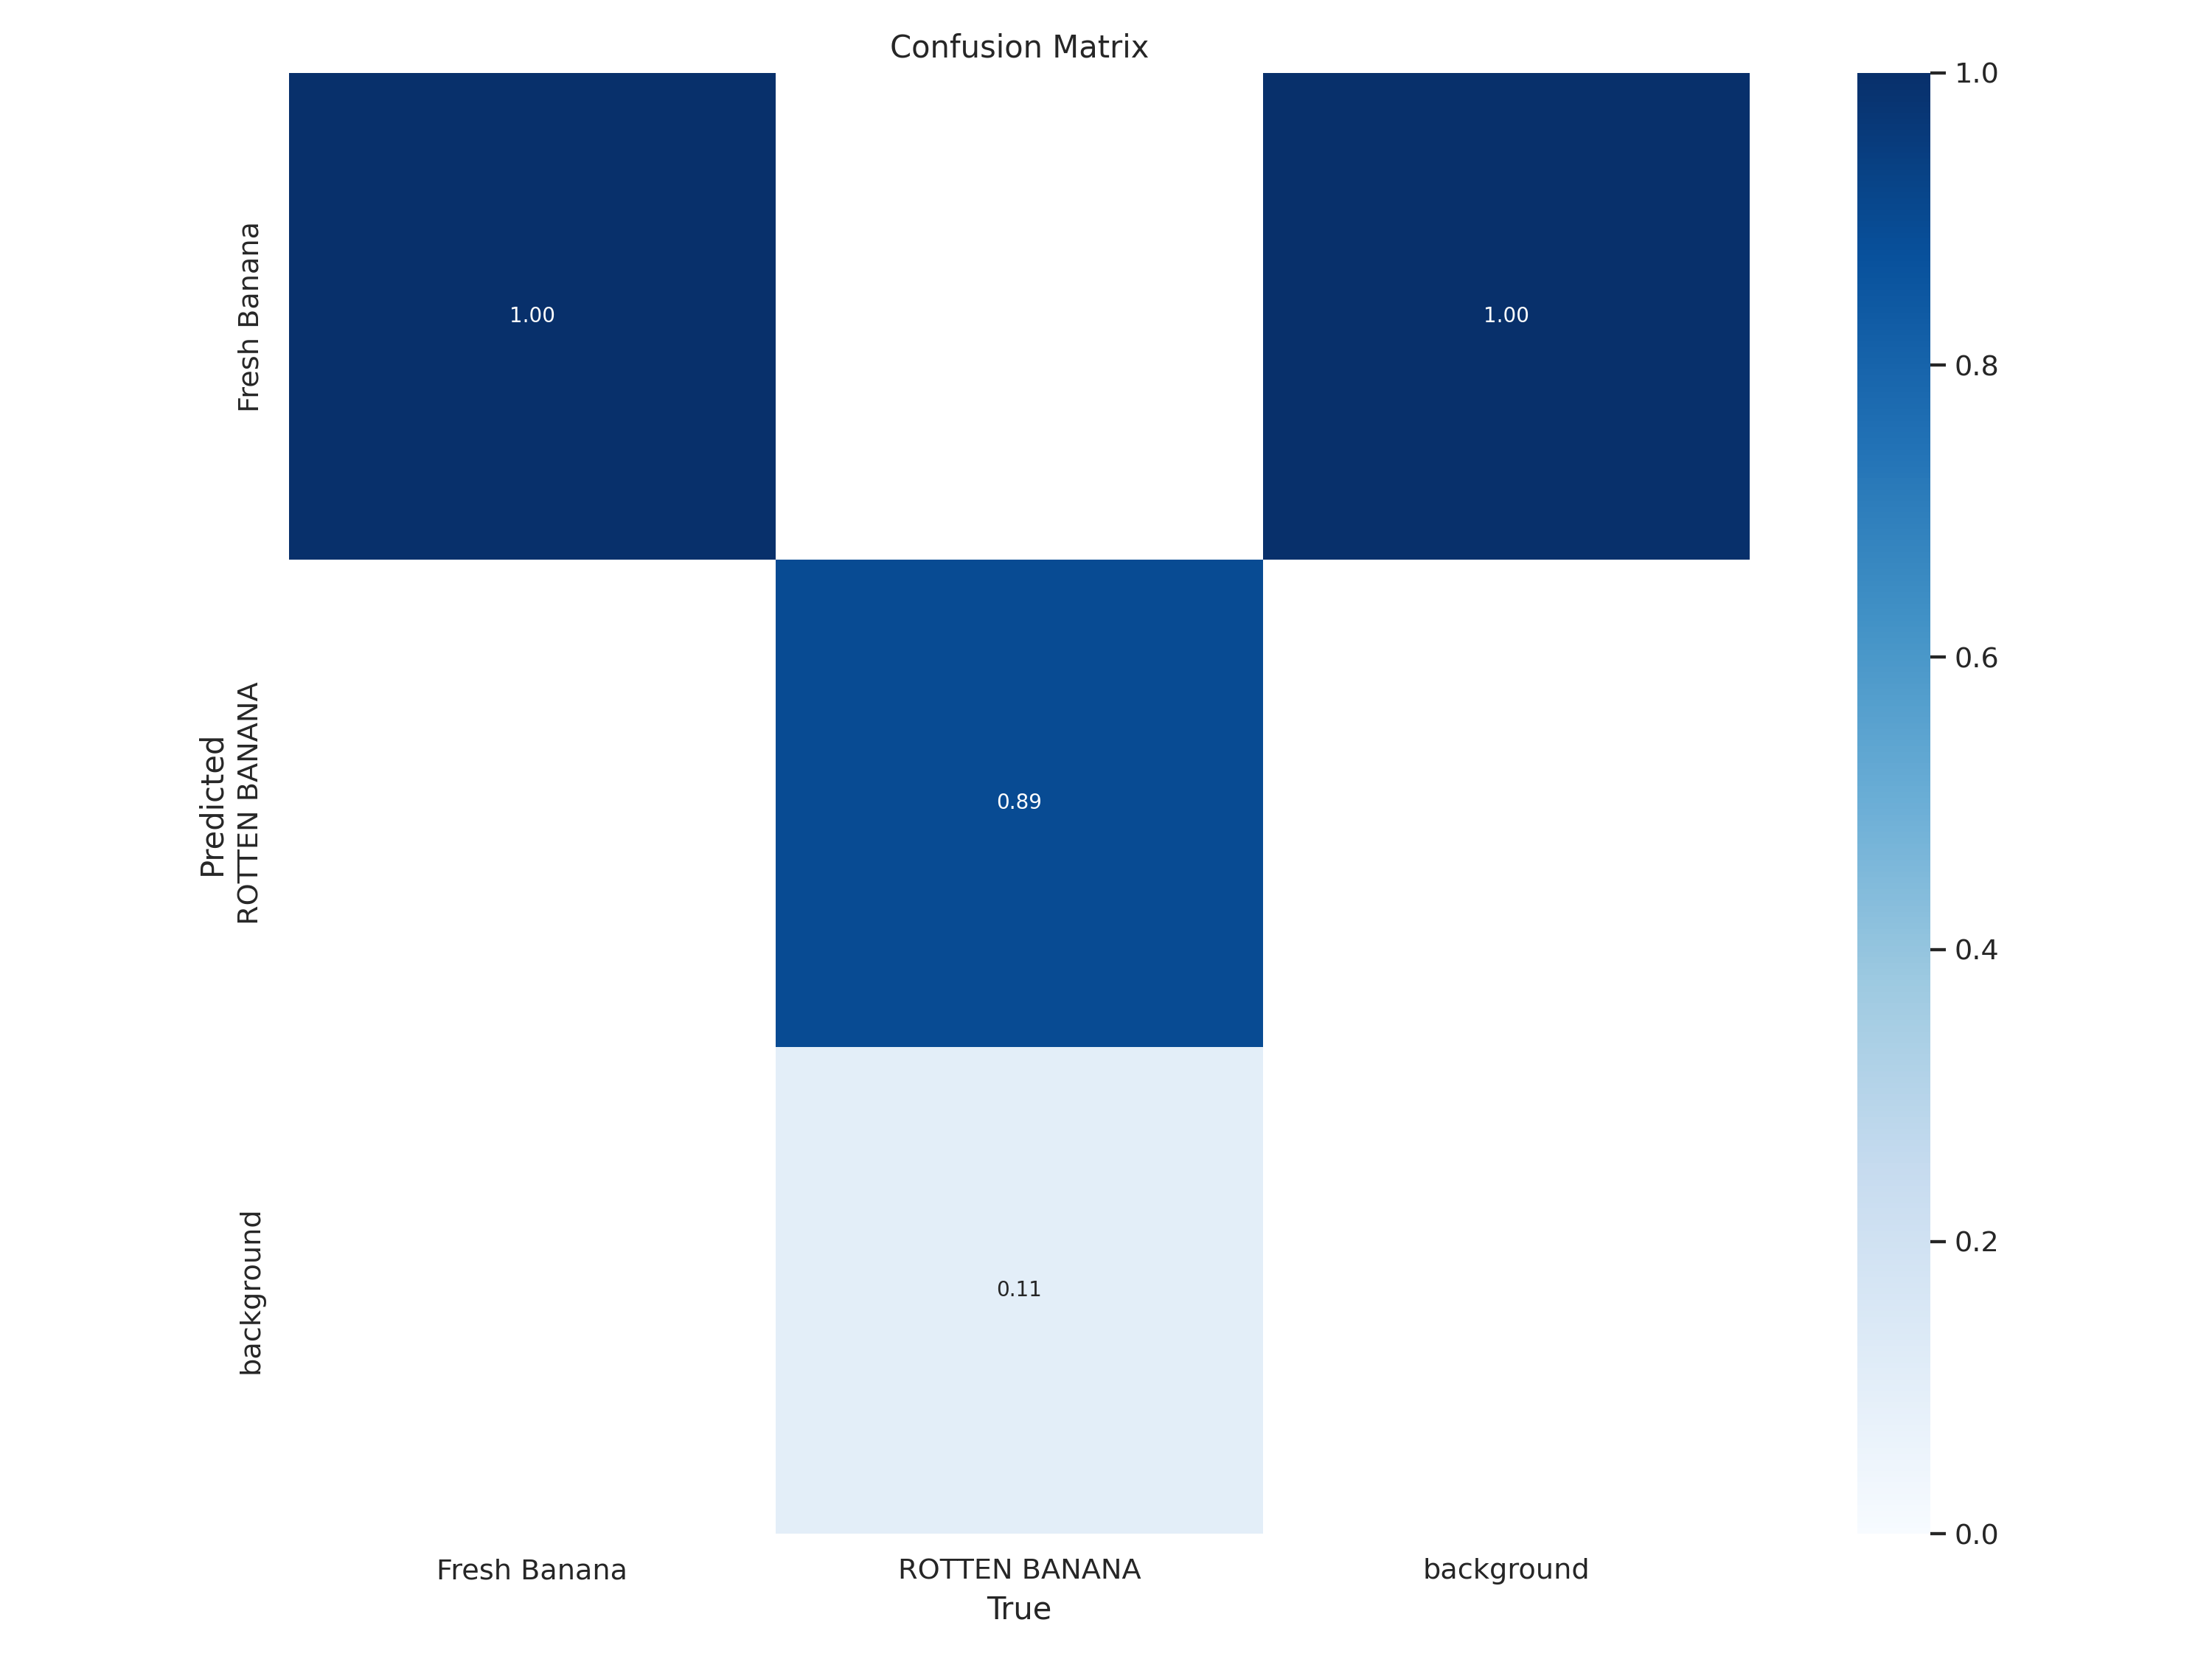

In [18]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png',width=600)

# ***Create F1 Curve Of Our Trained Dataset***

/content


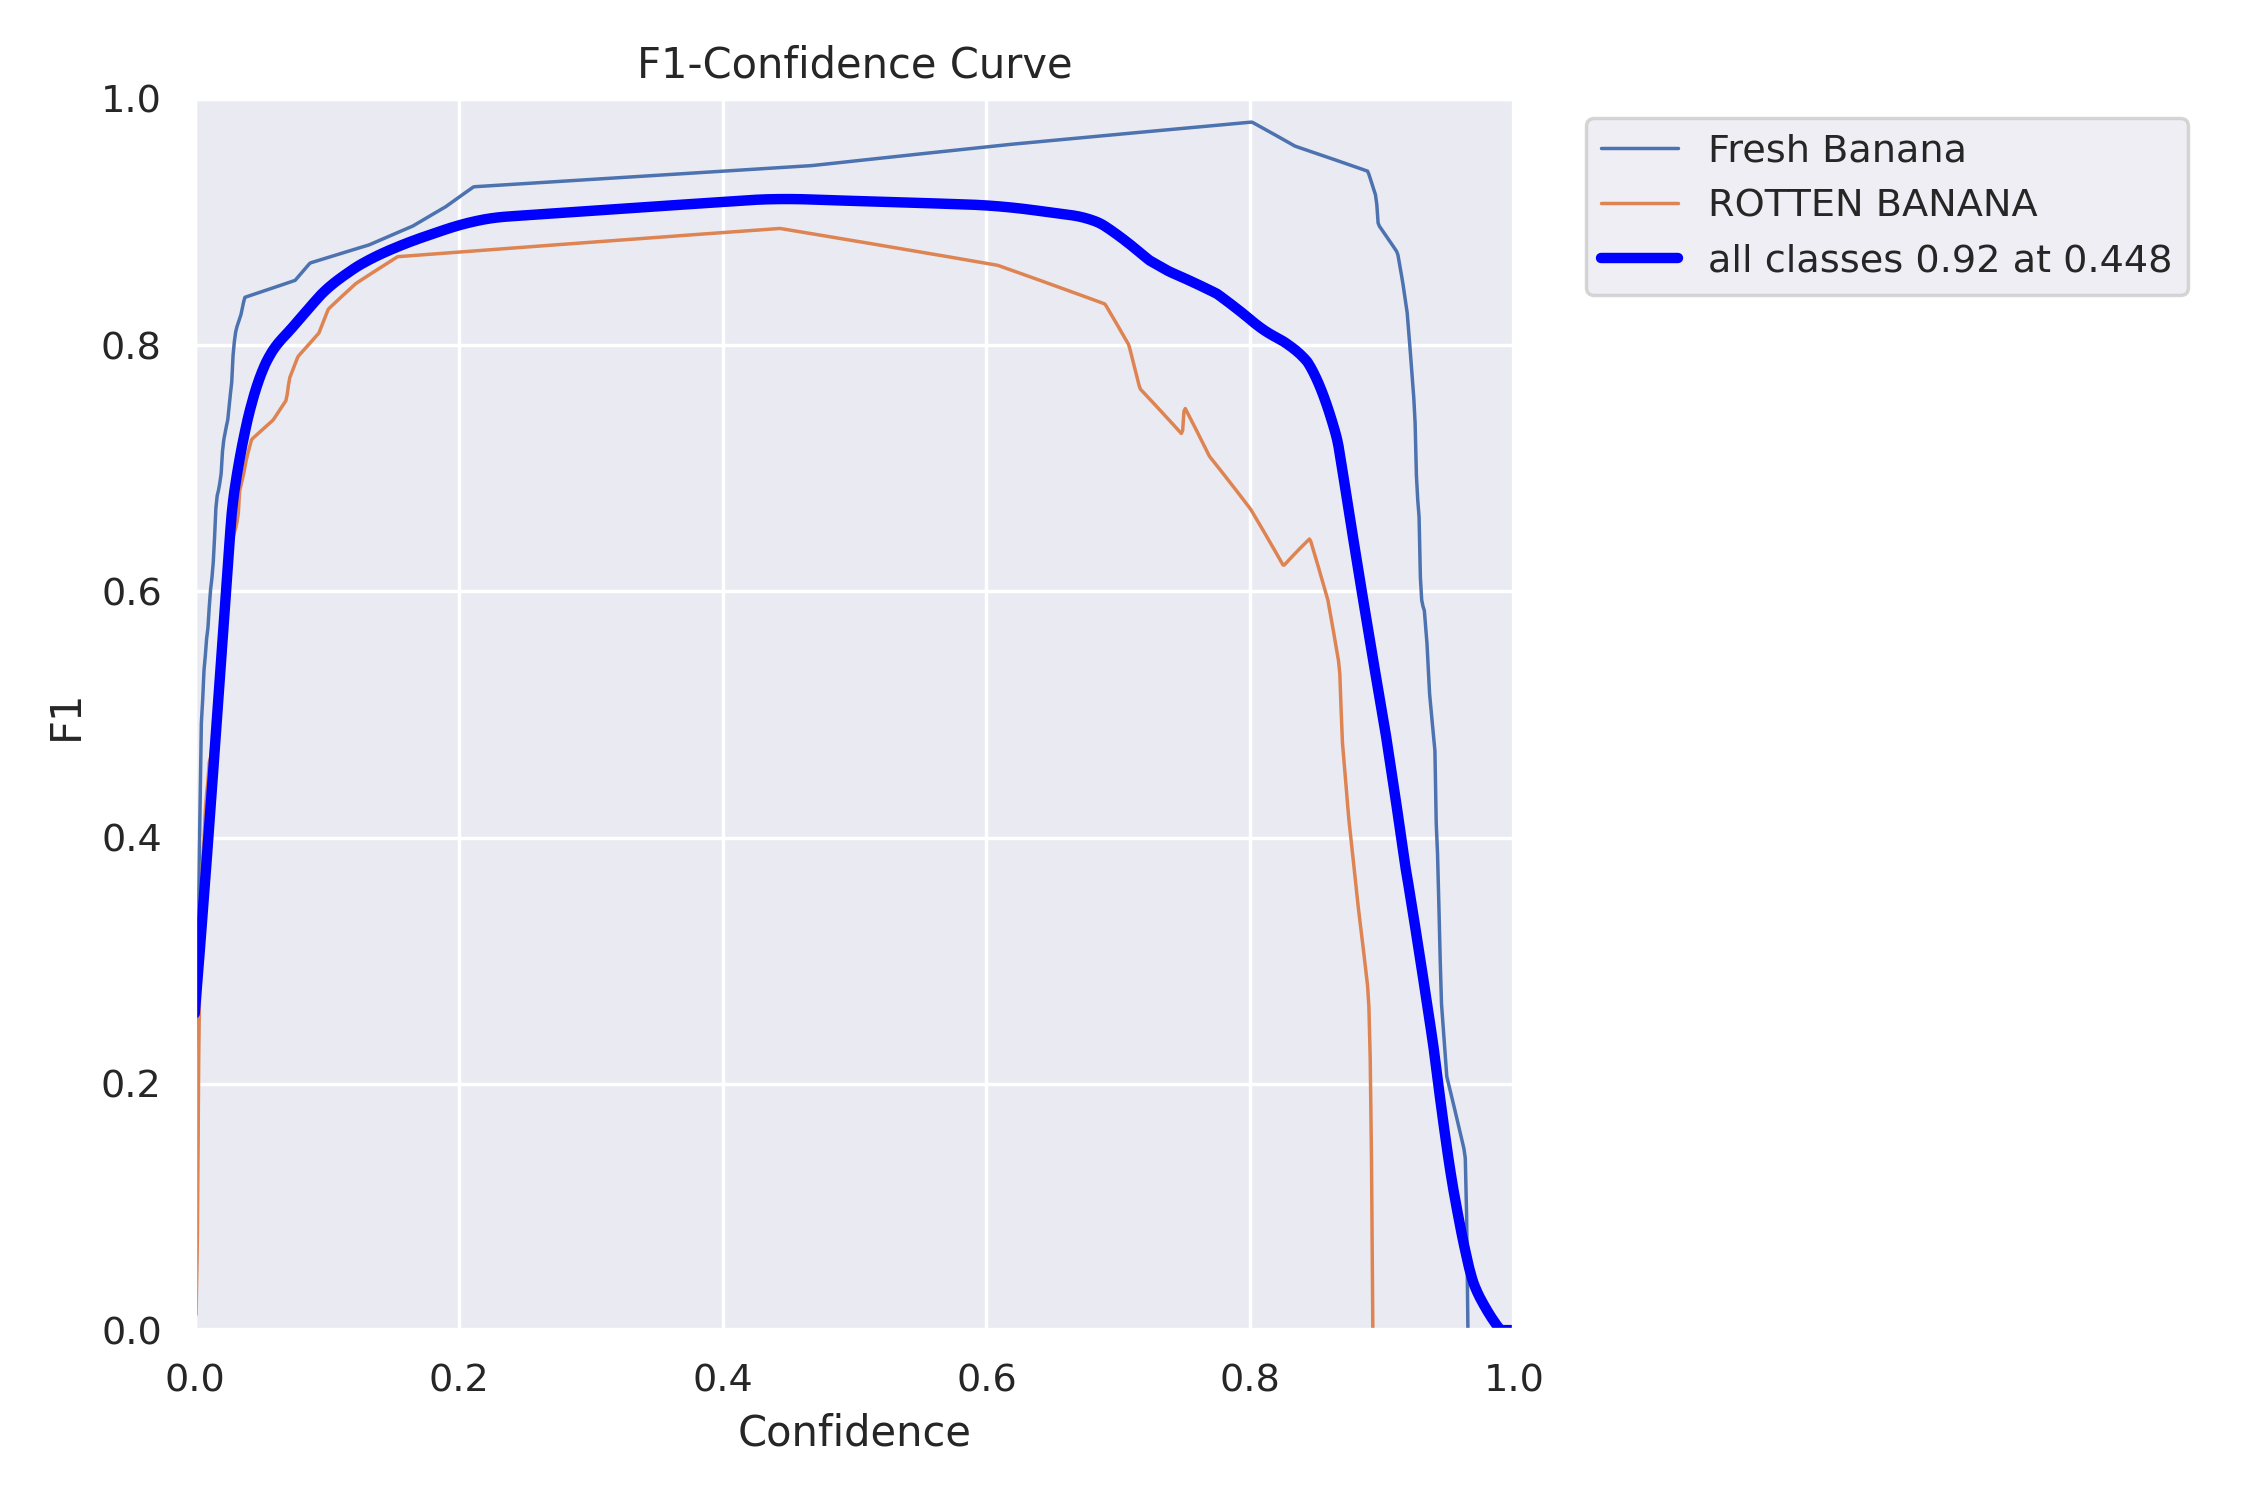

In [20]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/F1_curve.png',width=500)

# ***Create P curve Png***

/content


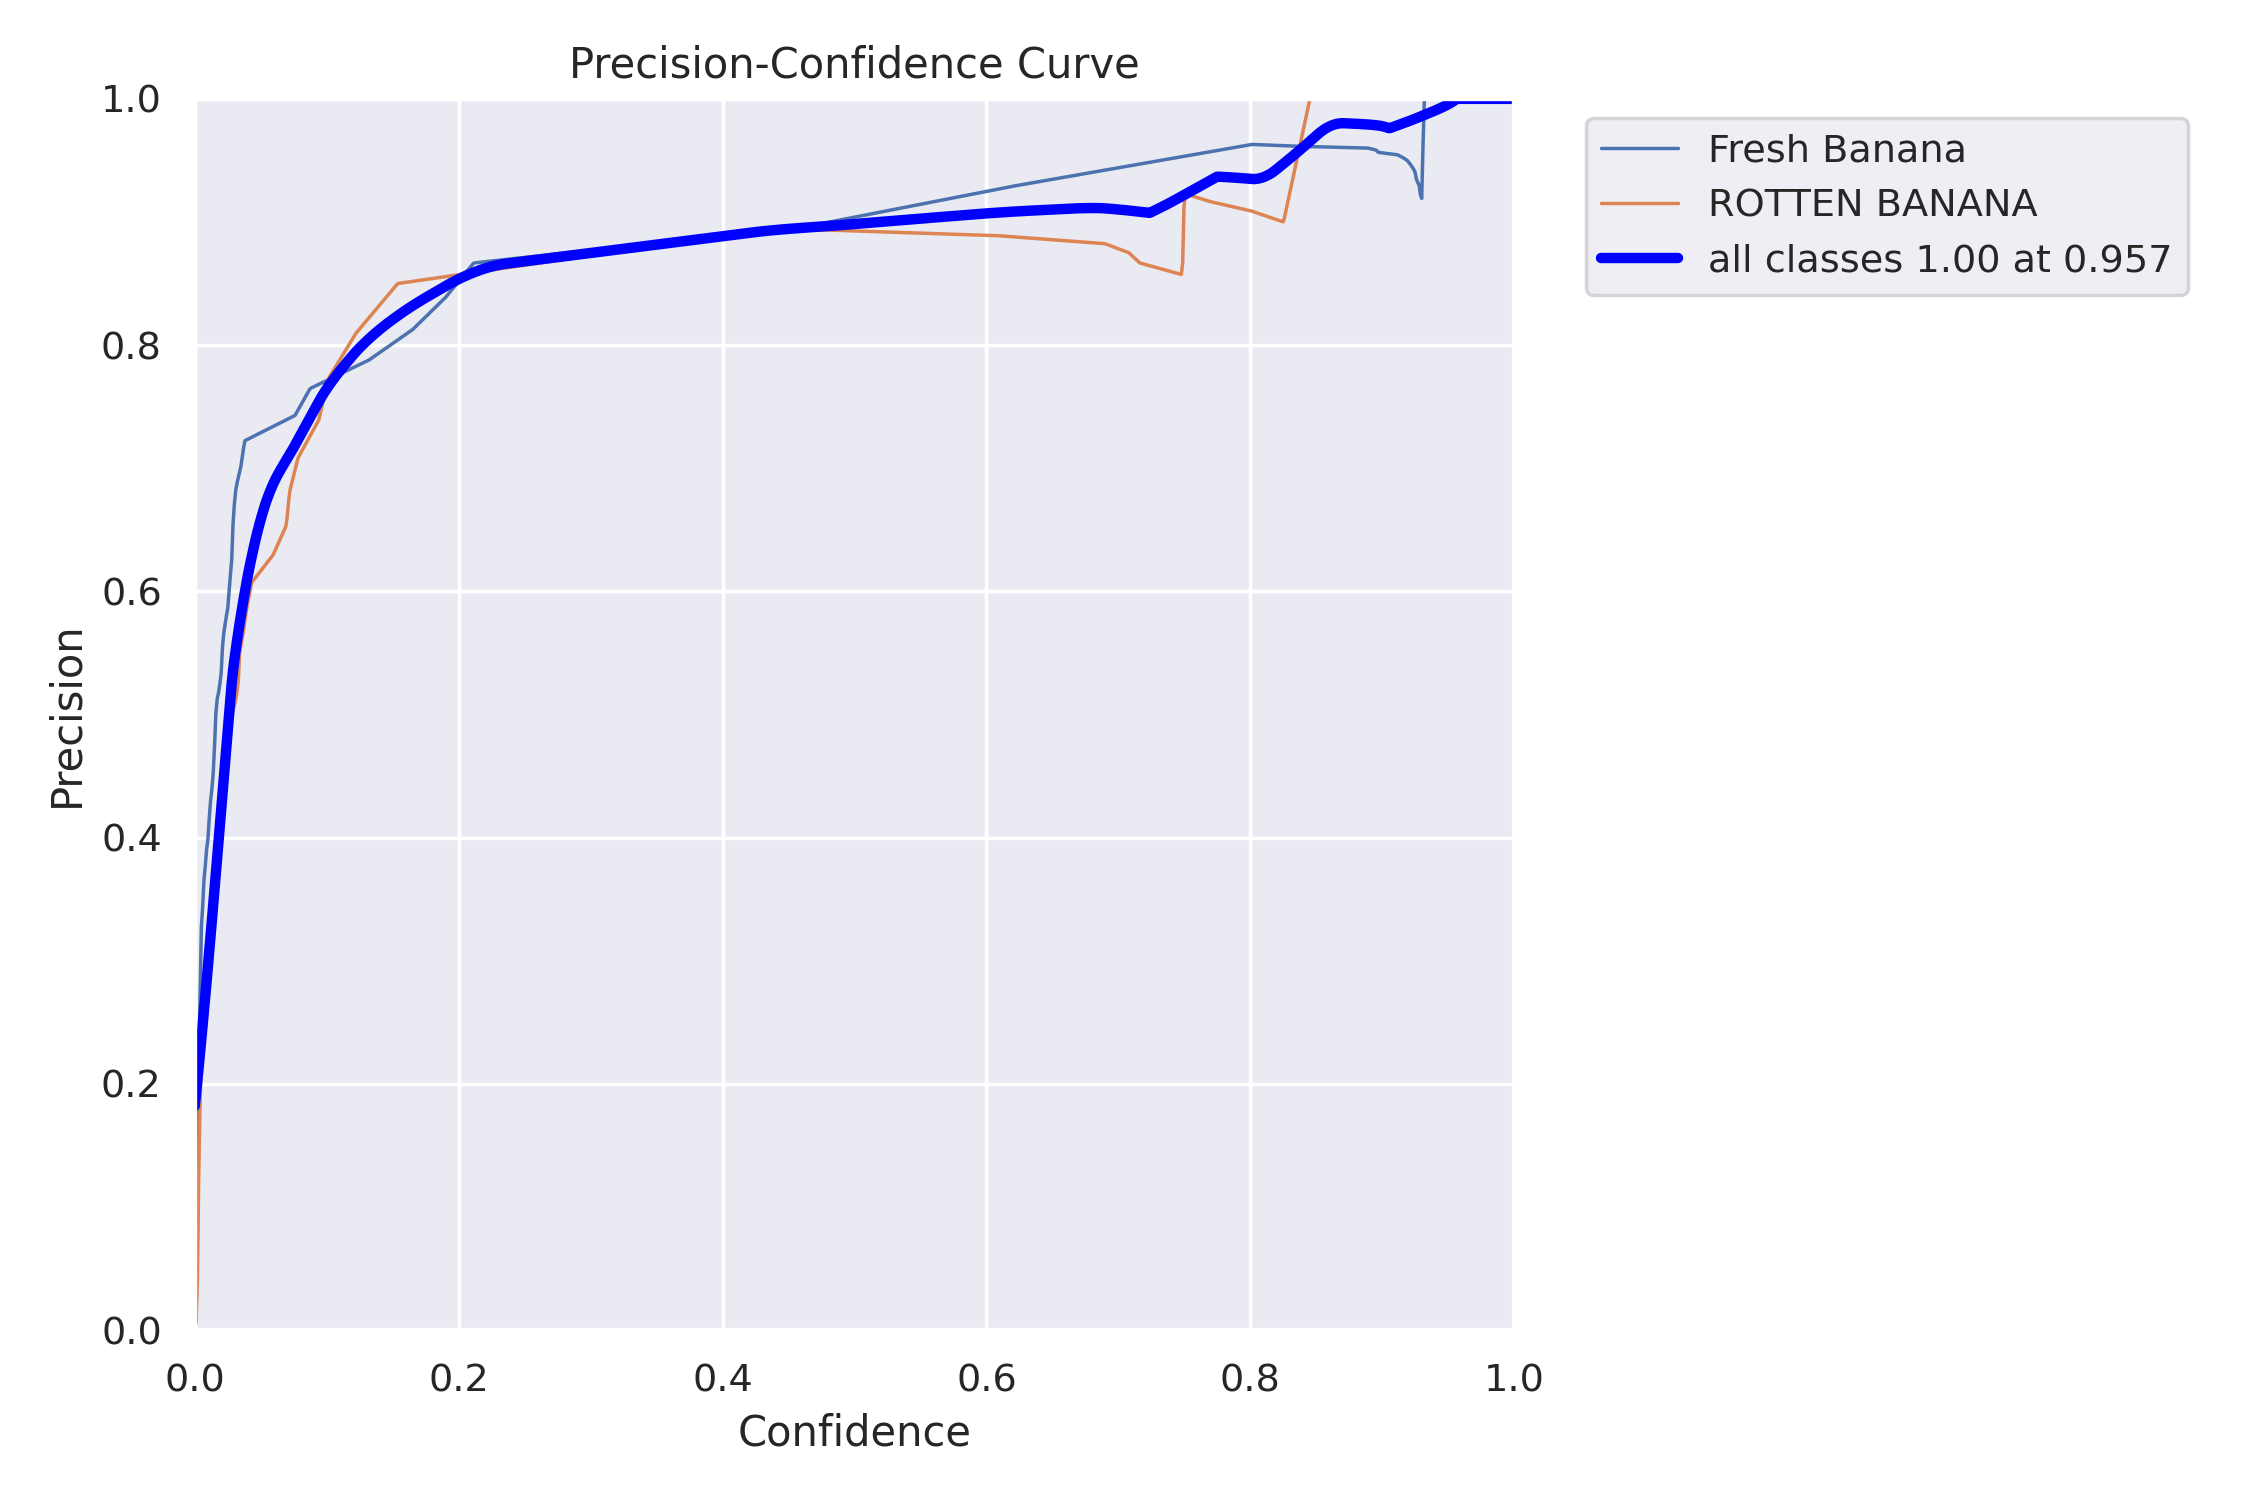

In [21]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/P_curve.png',width=500)

# Create A PR Curve After Training

/content


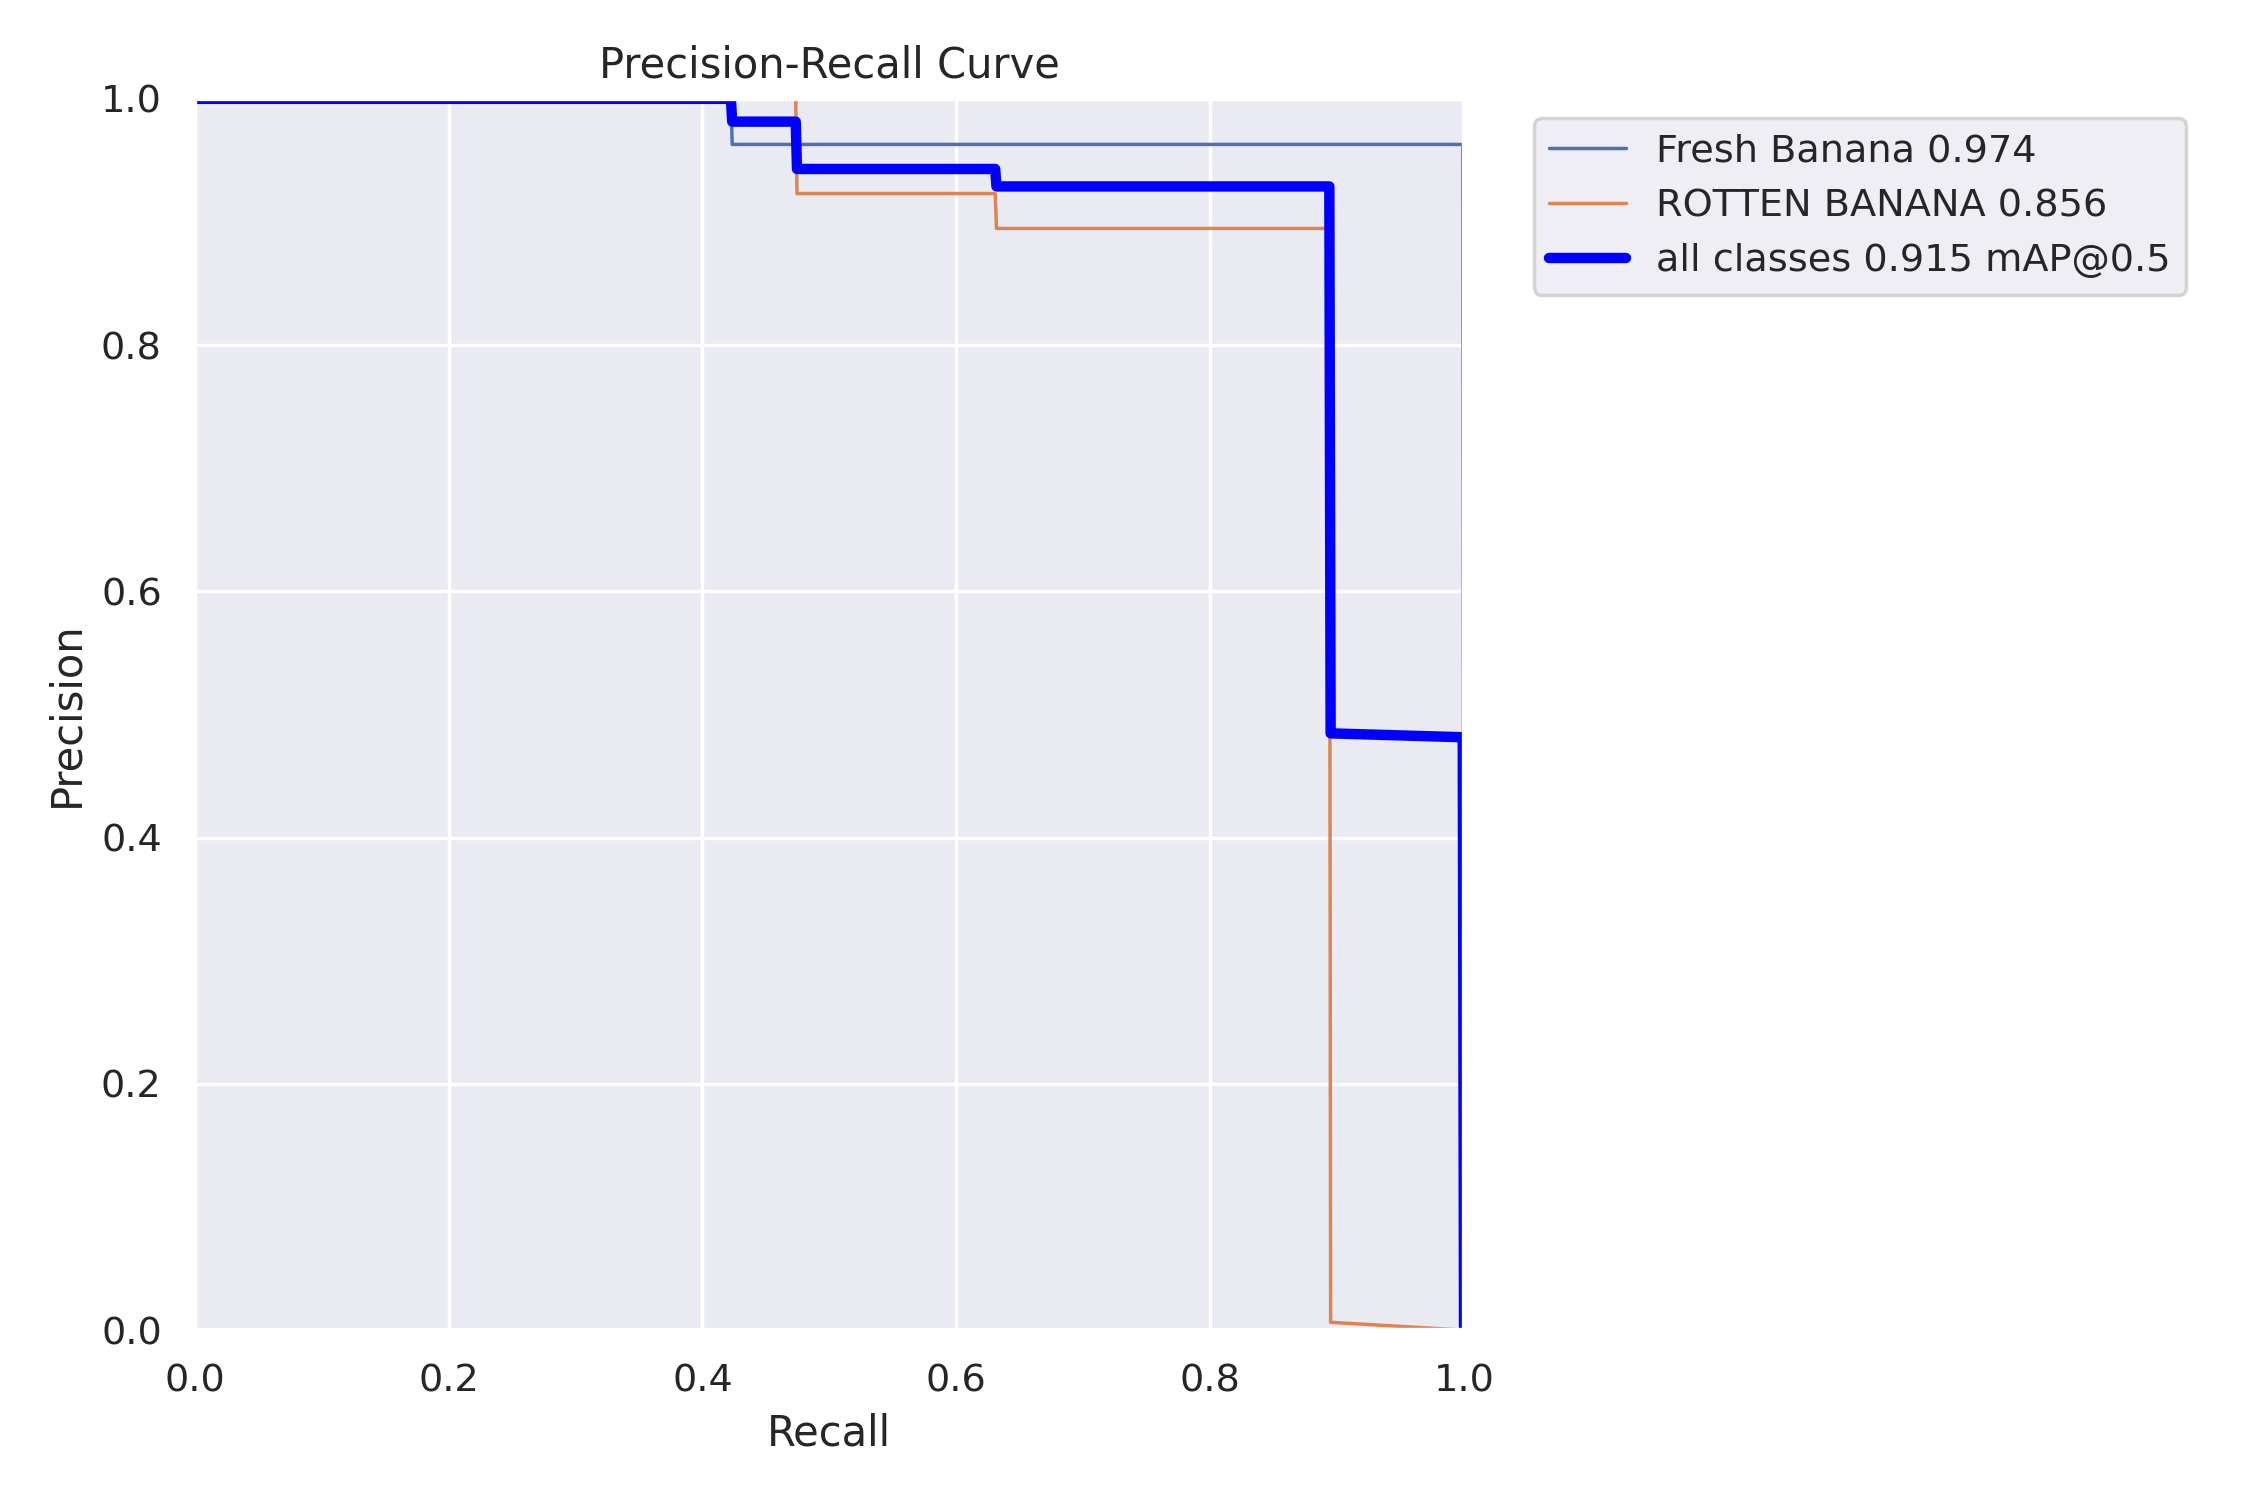

In [23]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/PR_curve.png',width=500)

# ***Create A R Curve***

/content


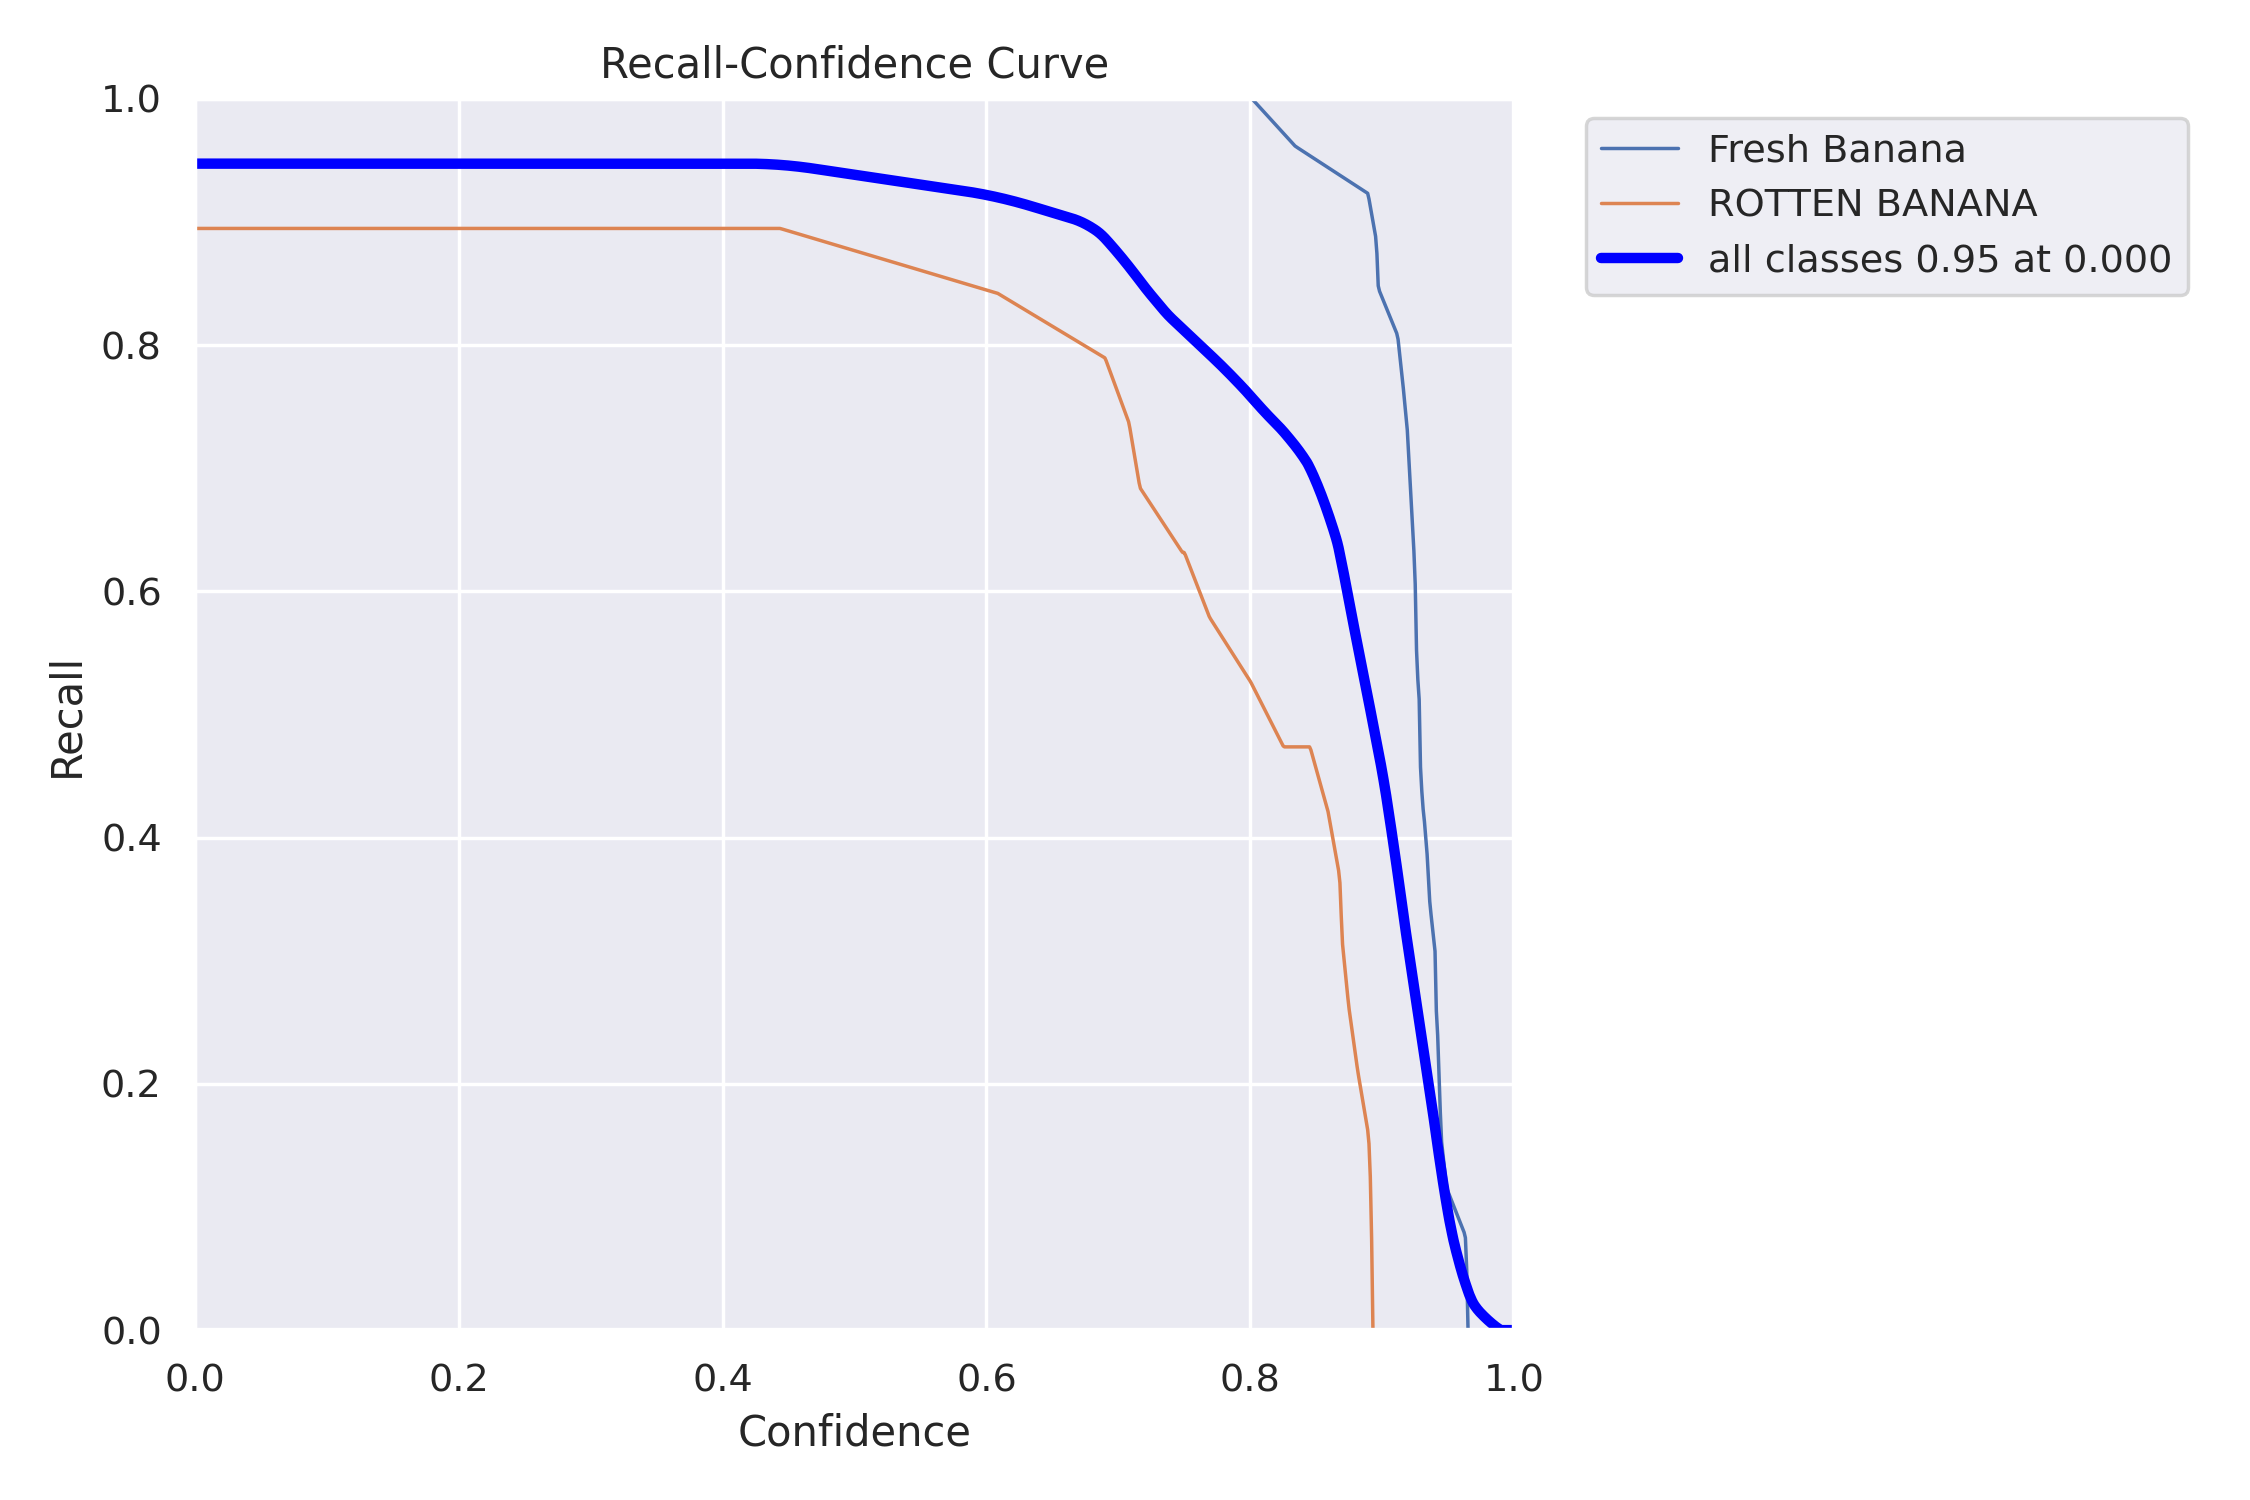

In [24]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/R_curve.png',width=500)

# ***Check All The results Of Our Trained Dataset***

/content


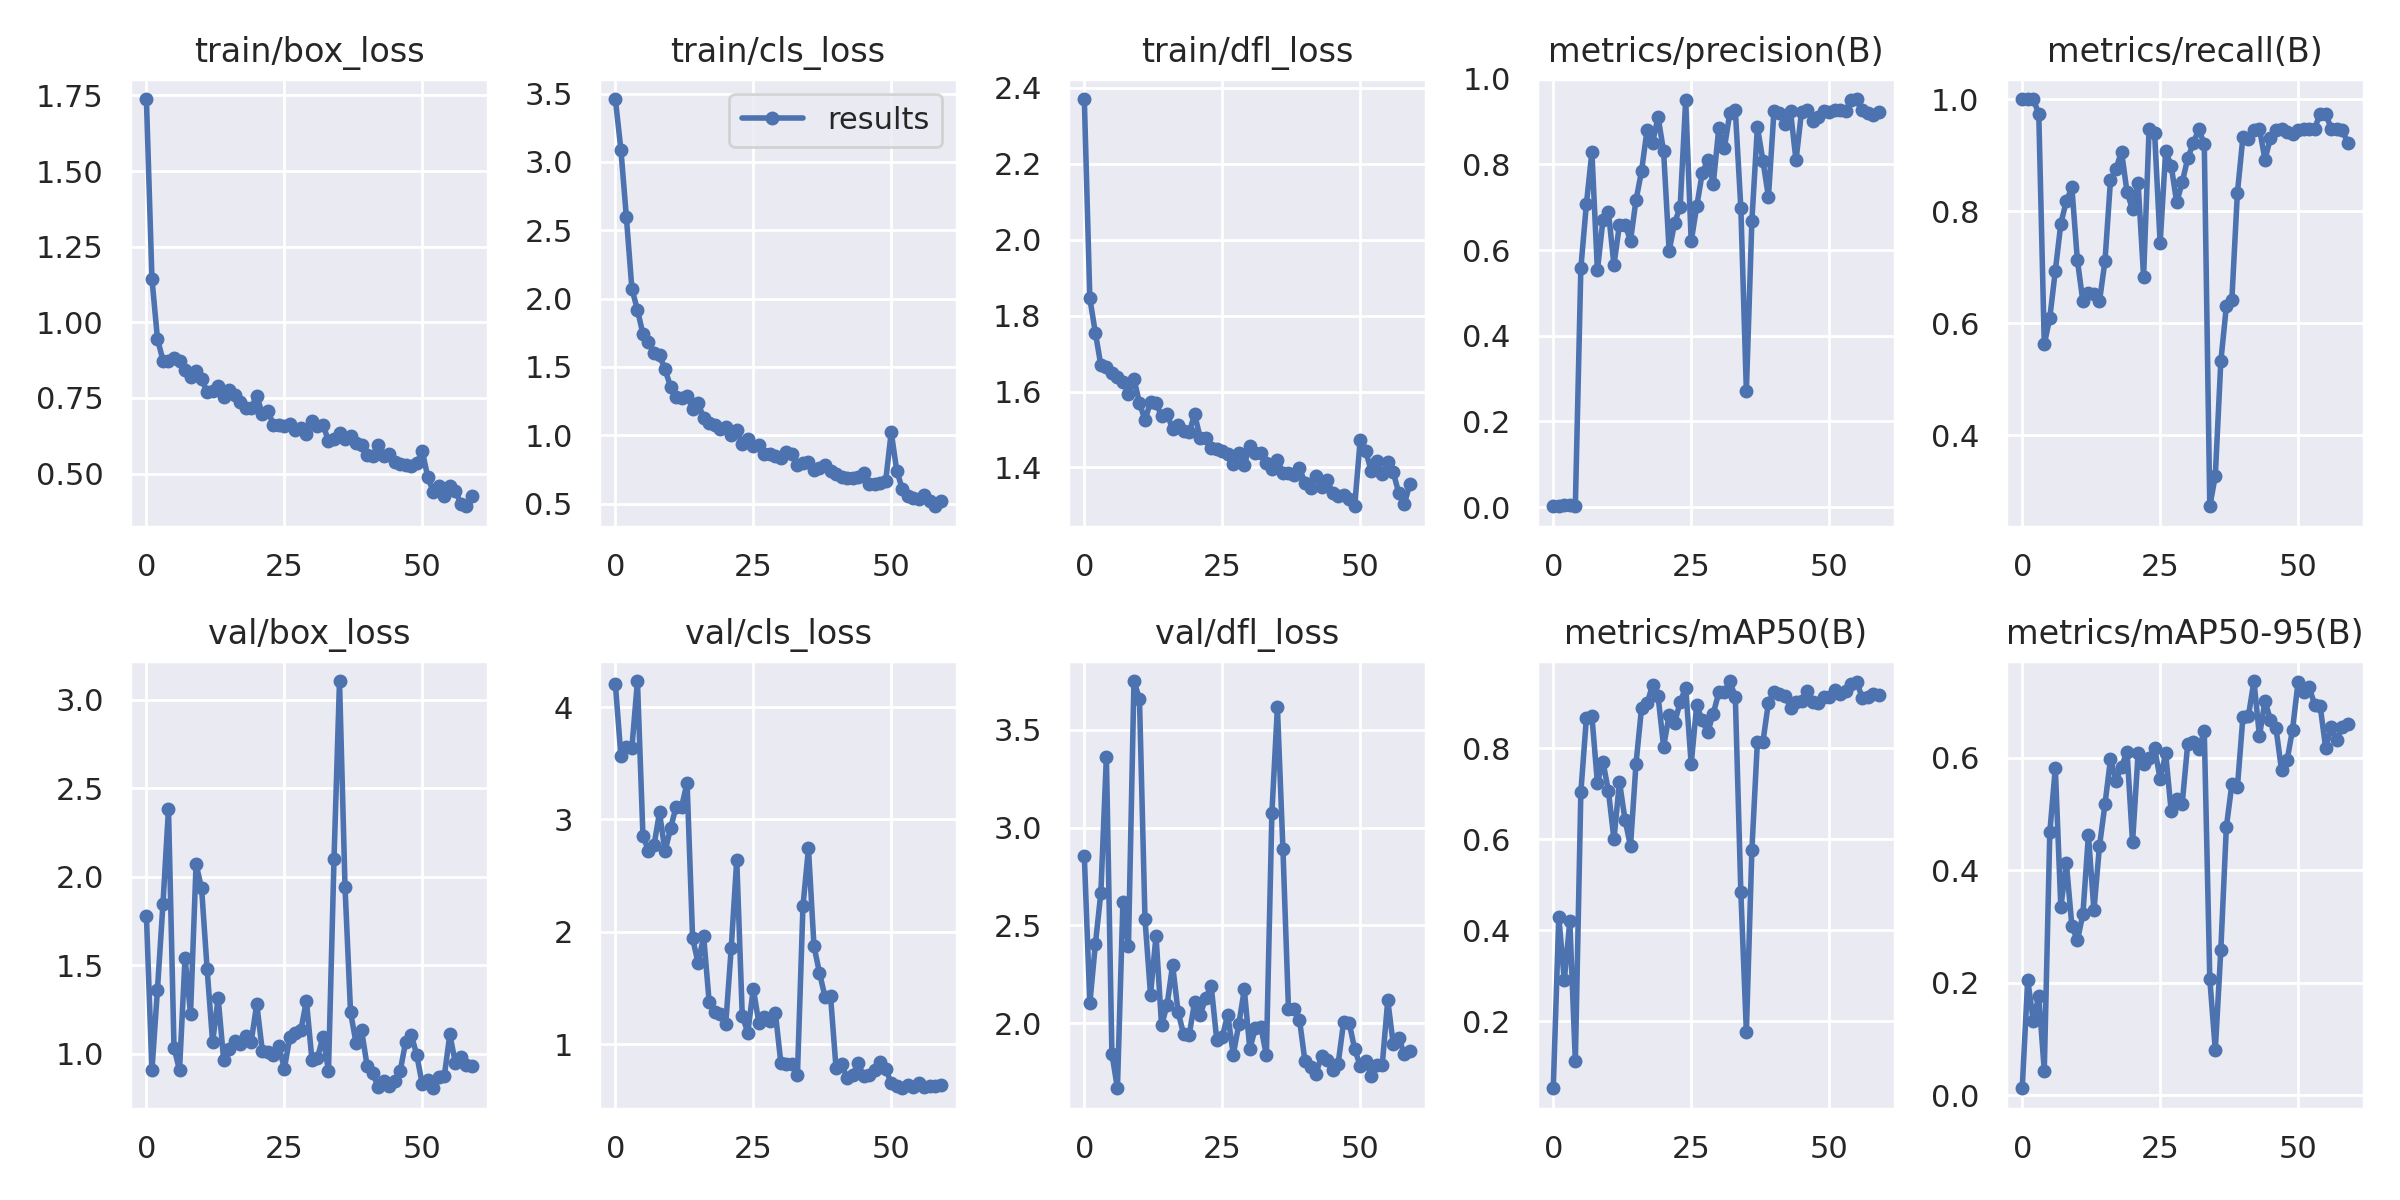

In [19]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/results.png',width=500)

# ***Create A Train Images After Training Custom Model***

/content


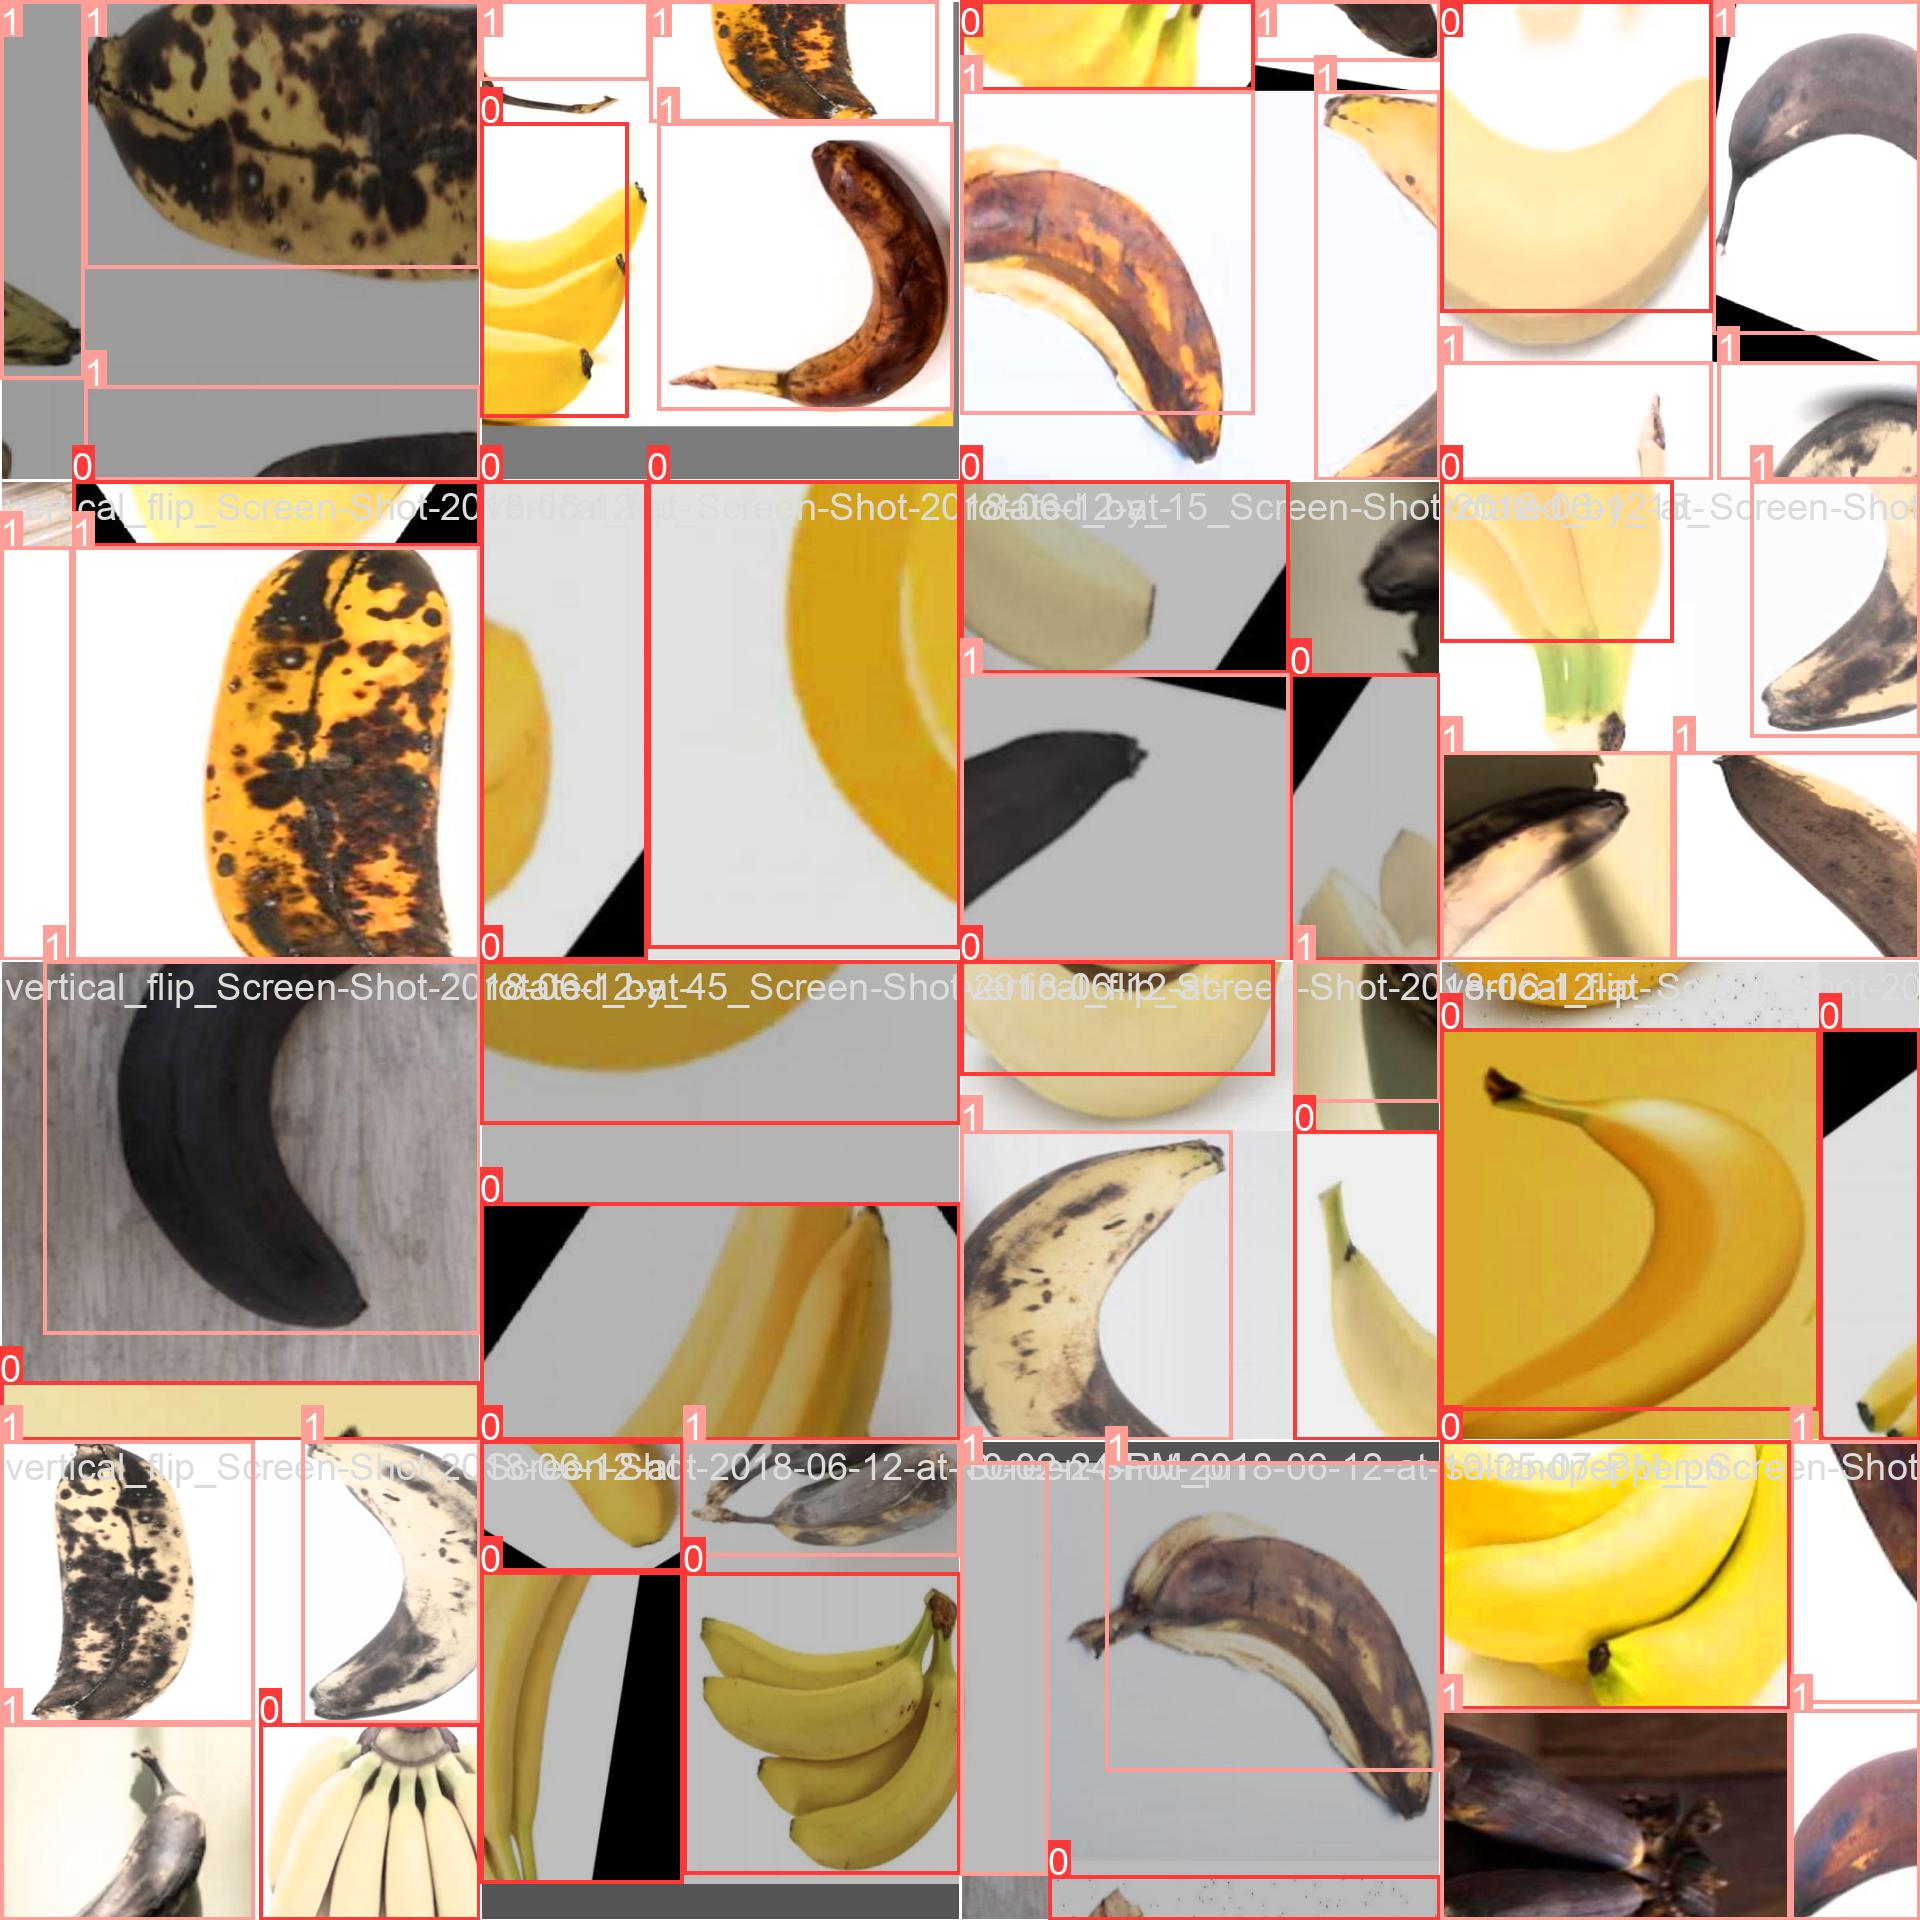

In [25]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/train_batch0.jpg',width=500)

# ***Create A Train Batch1 Jpg Image***

/content


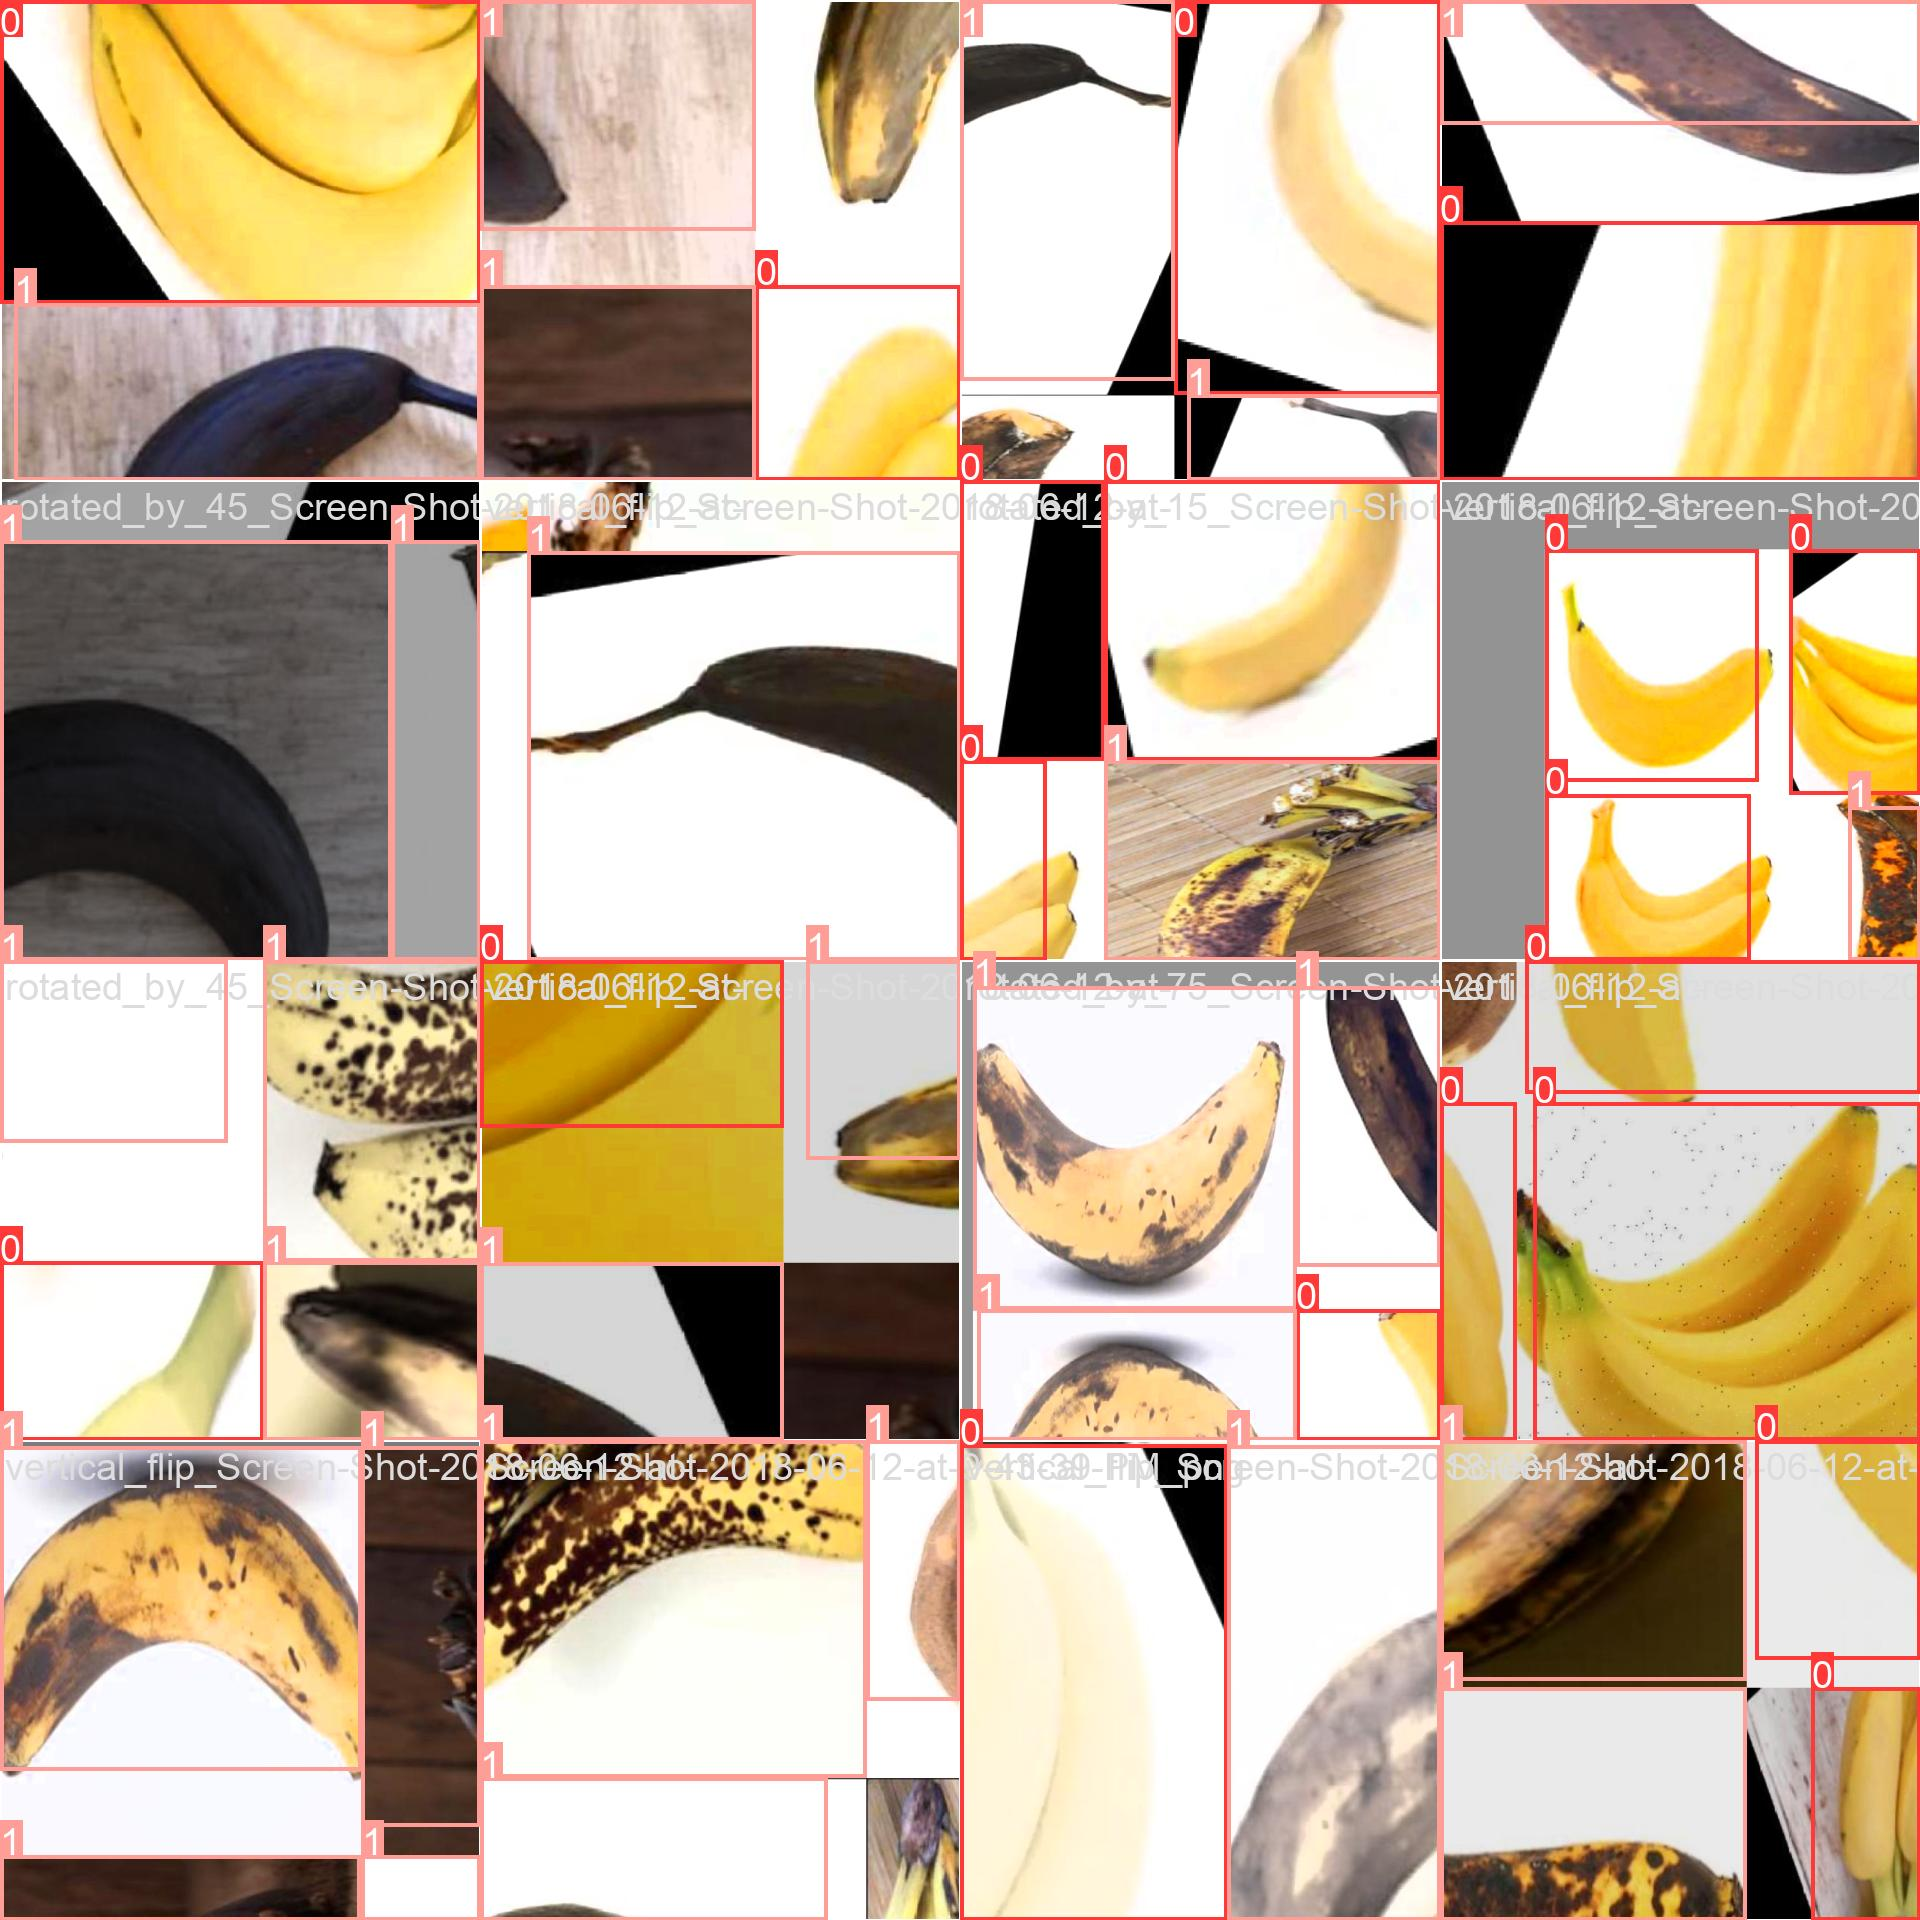

In [26]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/train_batch1.jpg',width=500)

# ***Create A Train Batch 2.jpg***

/content


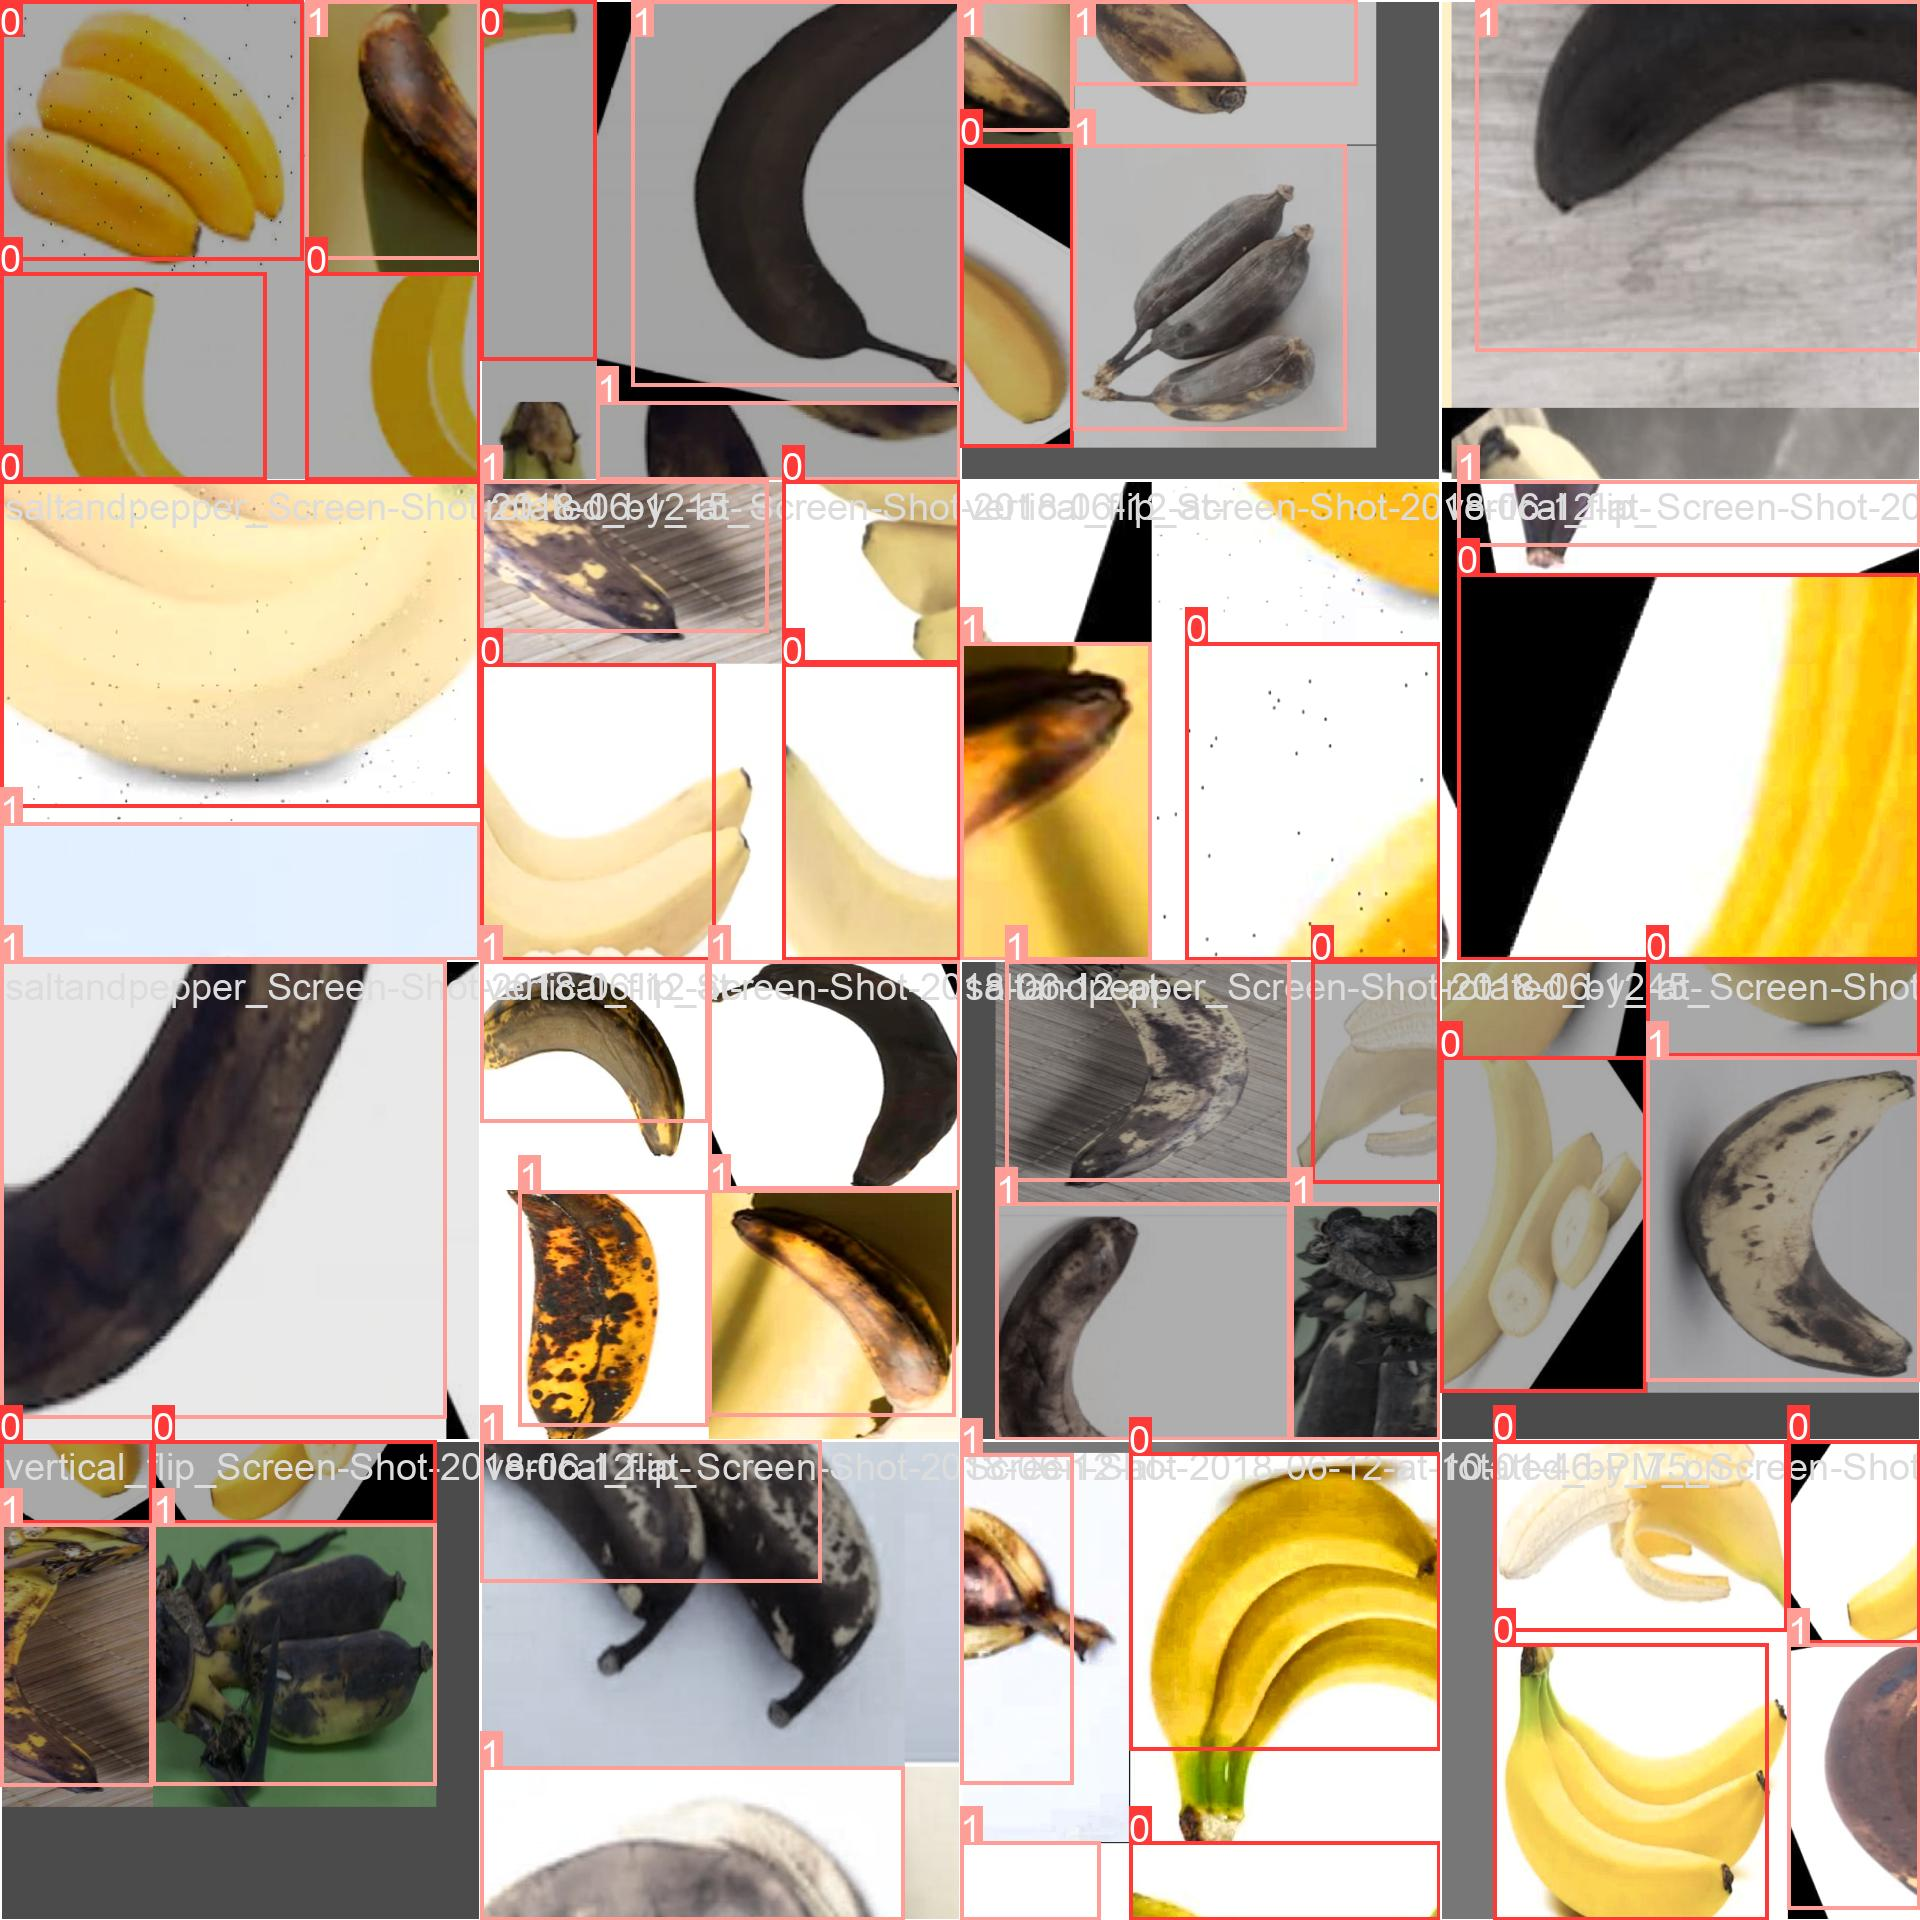

In [27]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/train_batch2.jpg',width=500)

# ***Create A Train Batch Image 700 jpg***

/content


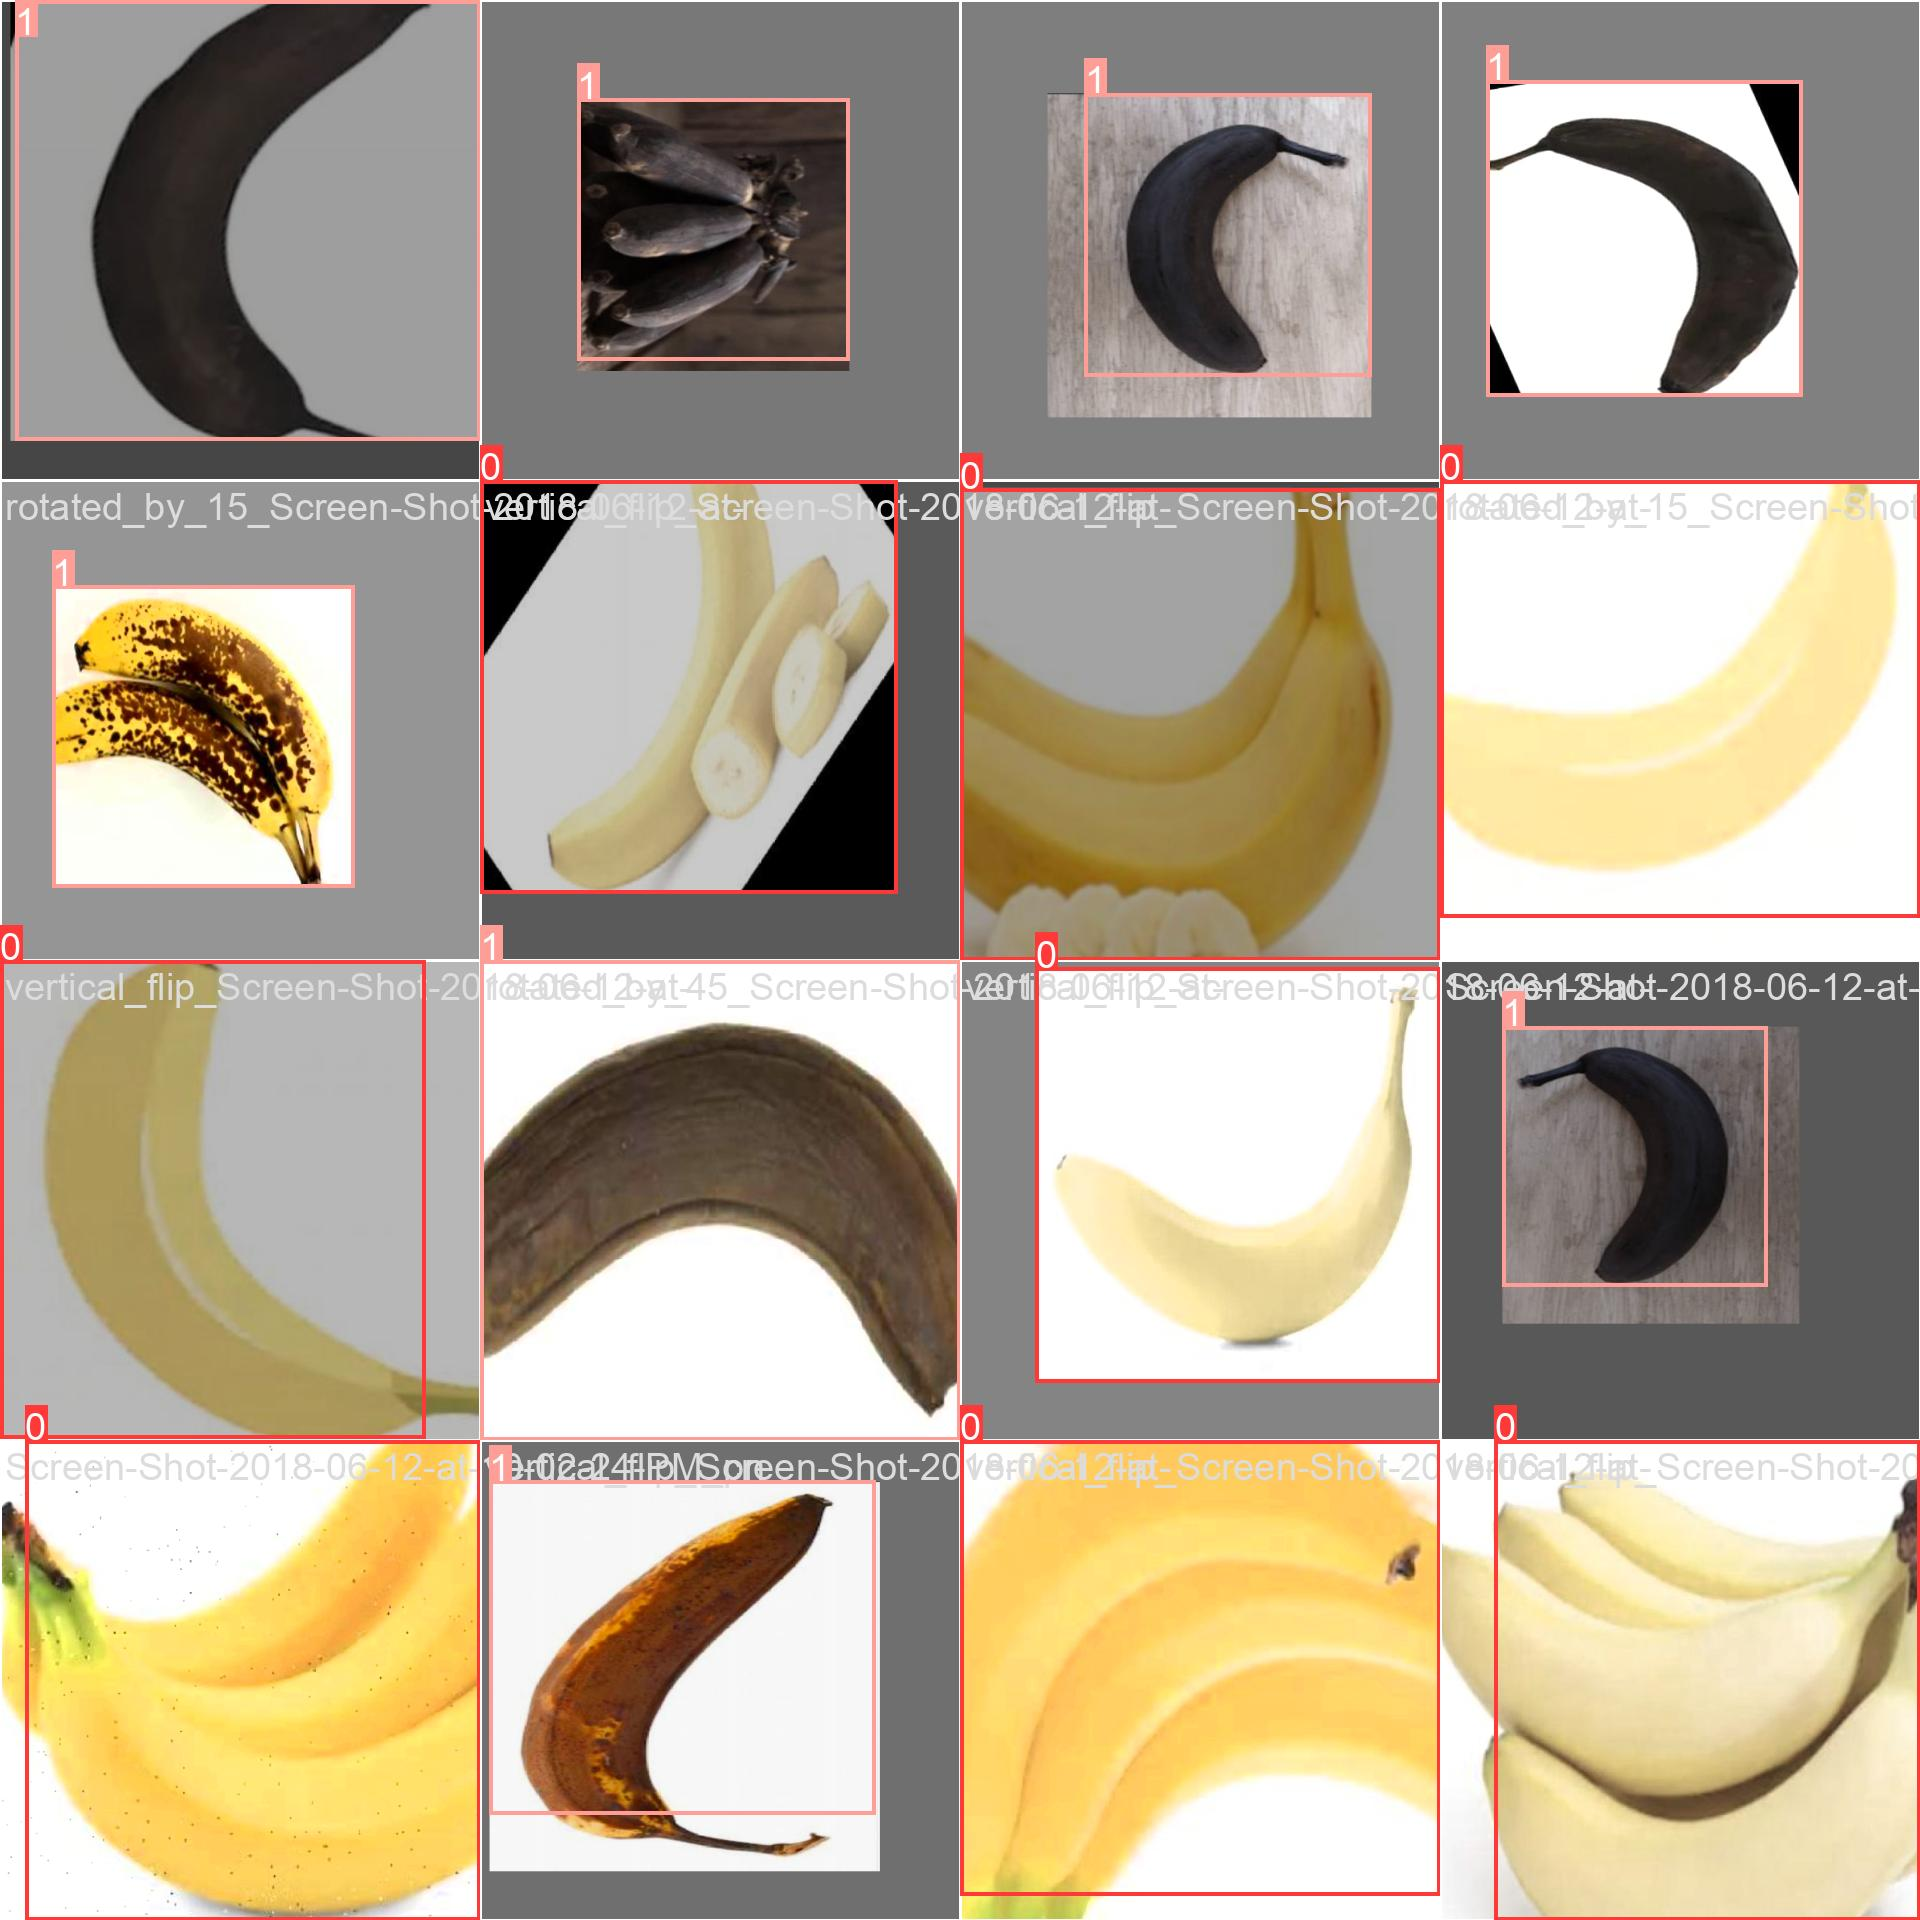

In [29]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/train_batch700.jpg',width=500)

# ***Create a Train Batch Image 701 jpg***

/content


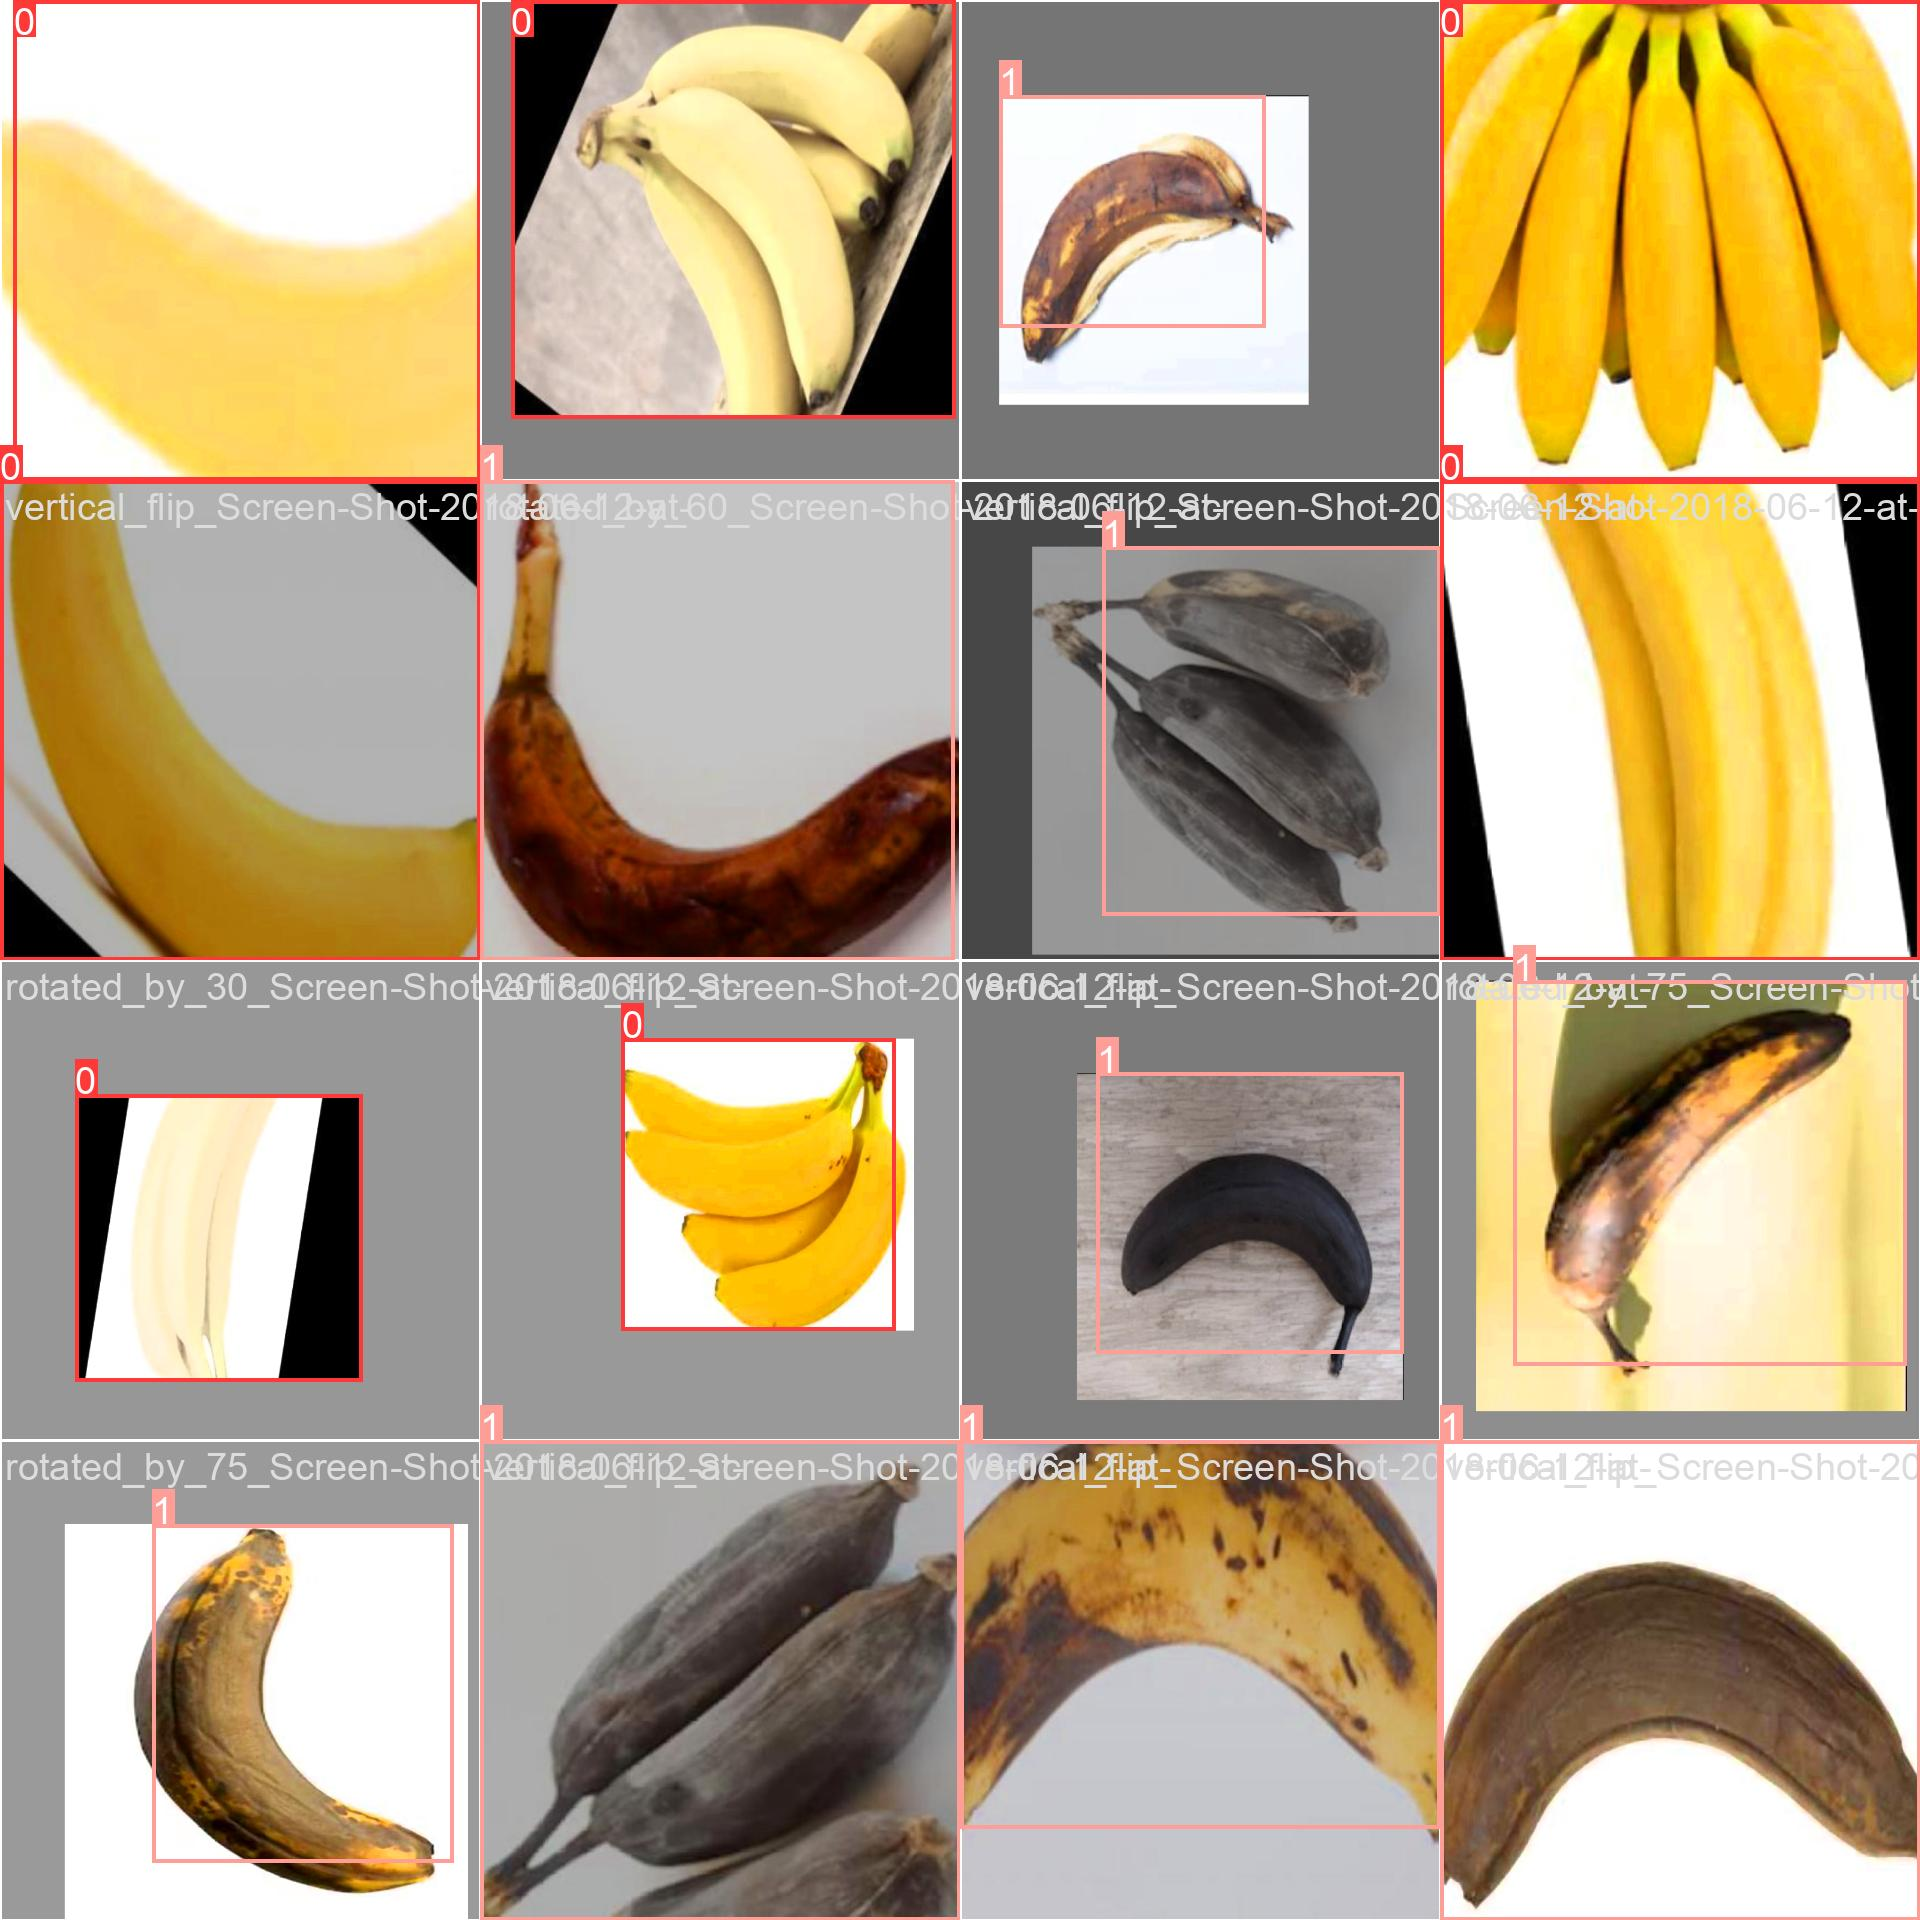

In [28]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/train_batch701.jpg',width=500)

# ***Create A Train Batch Image 702 jpg***

/content


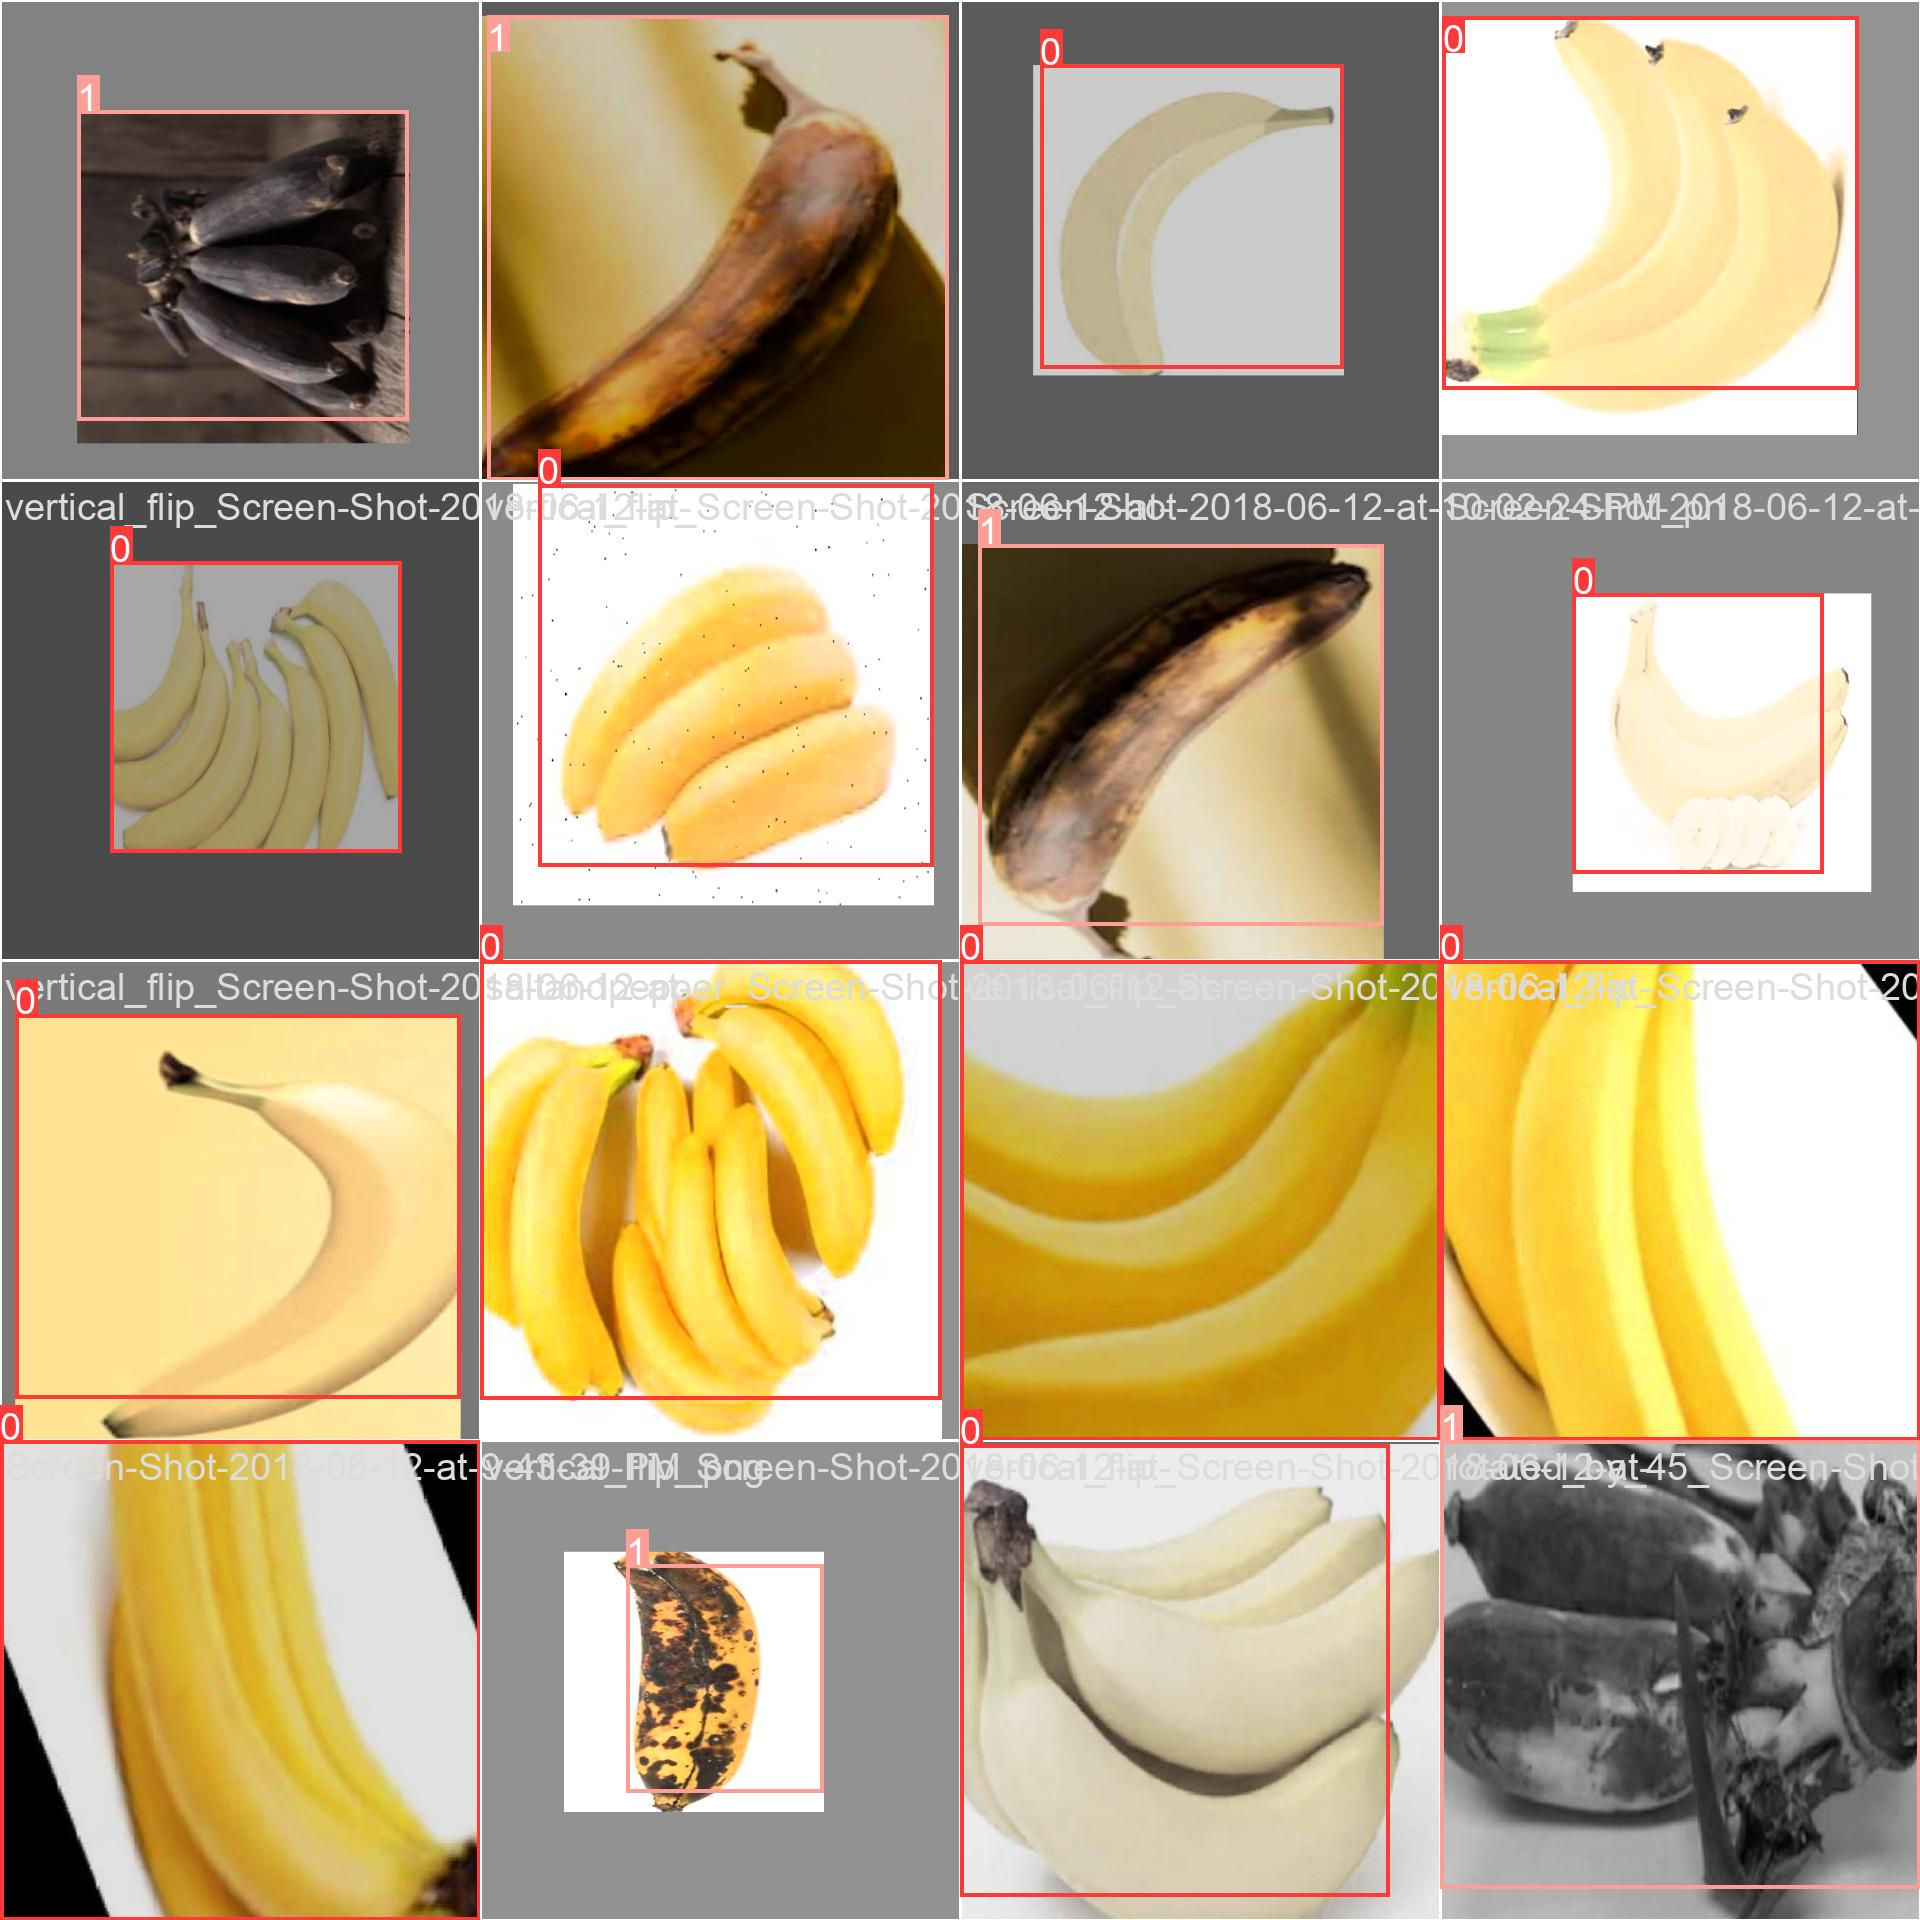

In [30]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/train_batch702.jpg',width=500)

# ***Creating A predicted Image Of Trained Model Using Yolov8***

/content


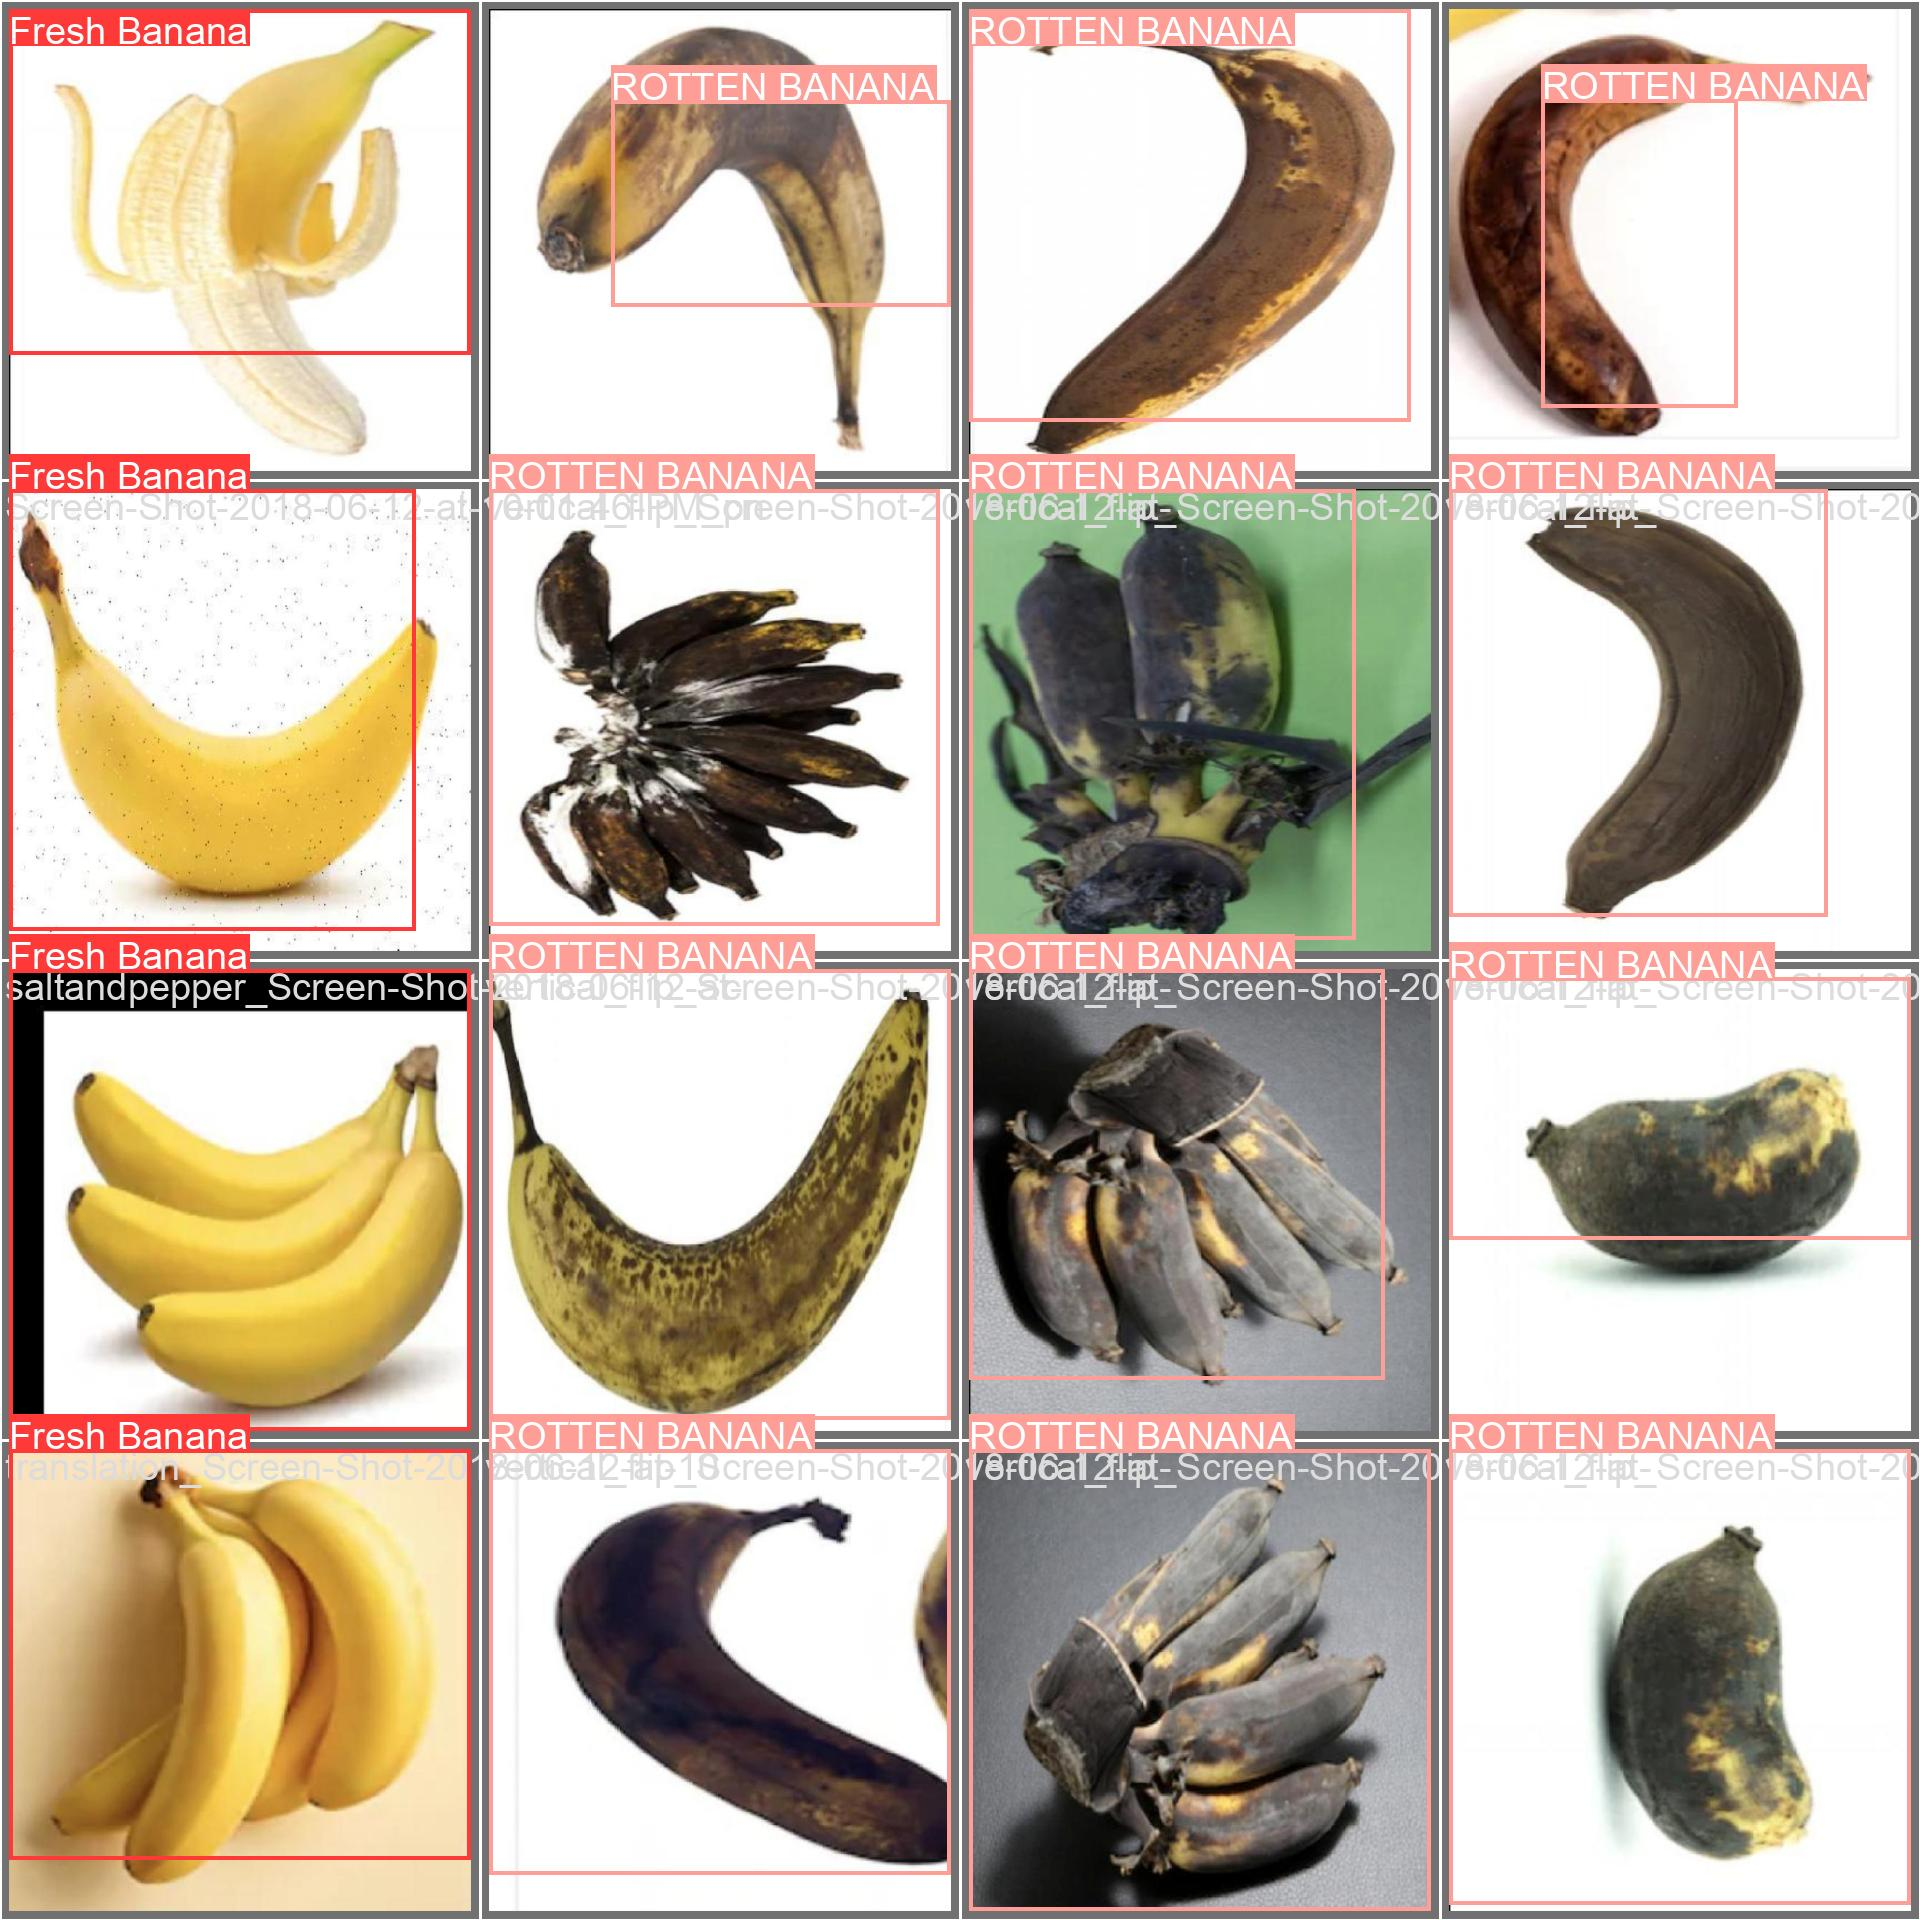

In [31]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/val_batch0_labels.jpg',width=500)

/content


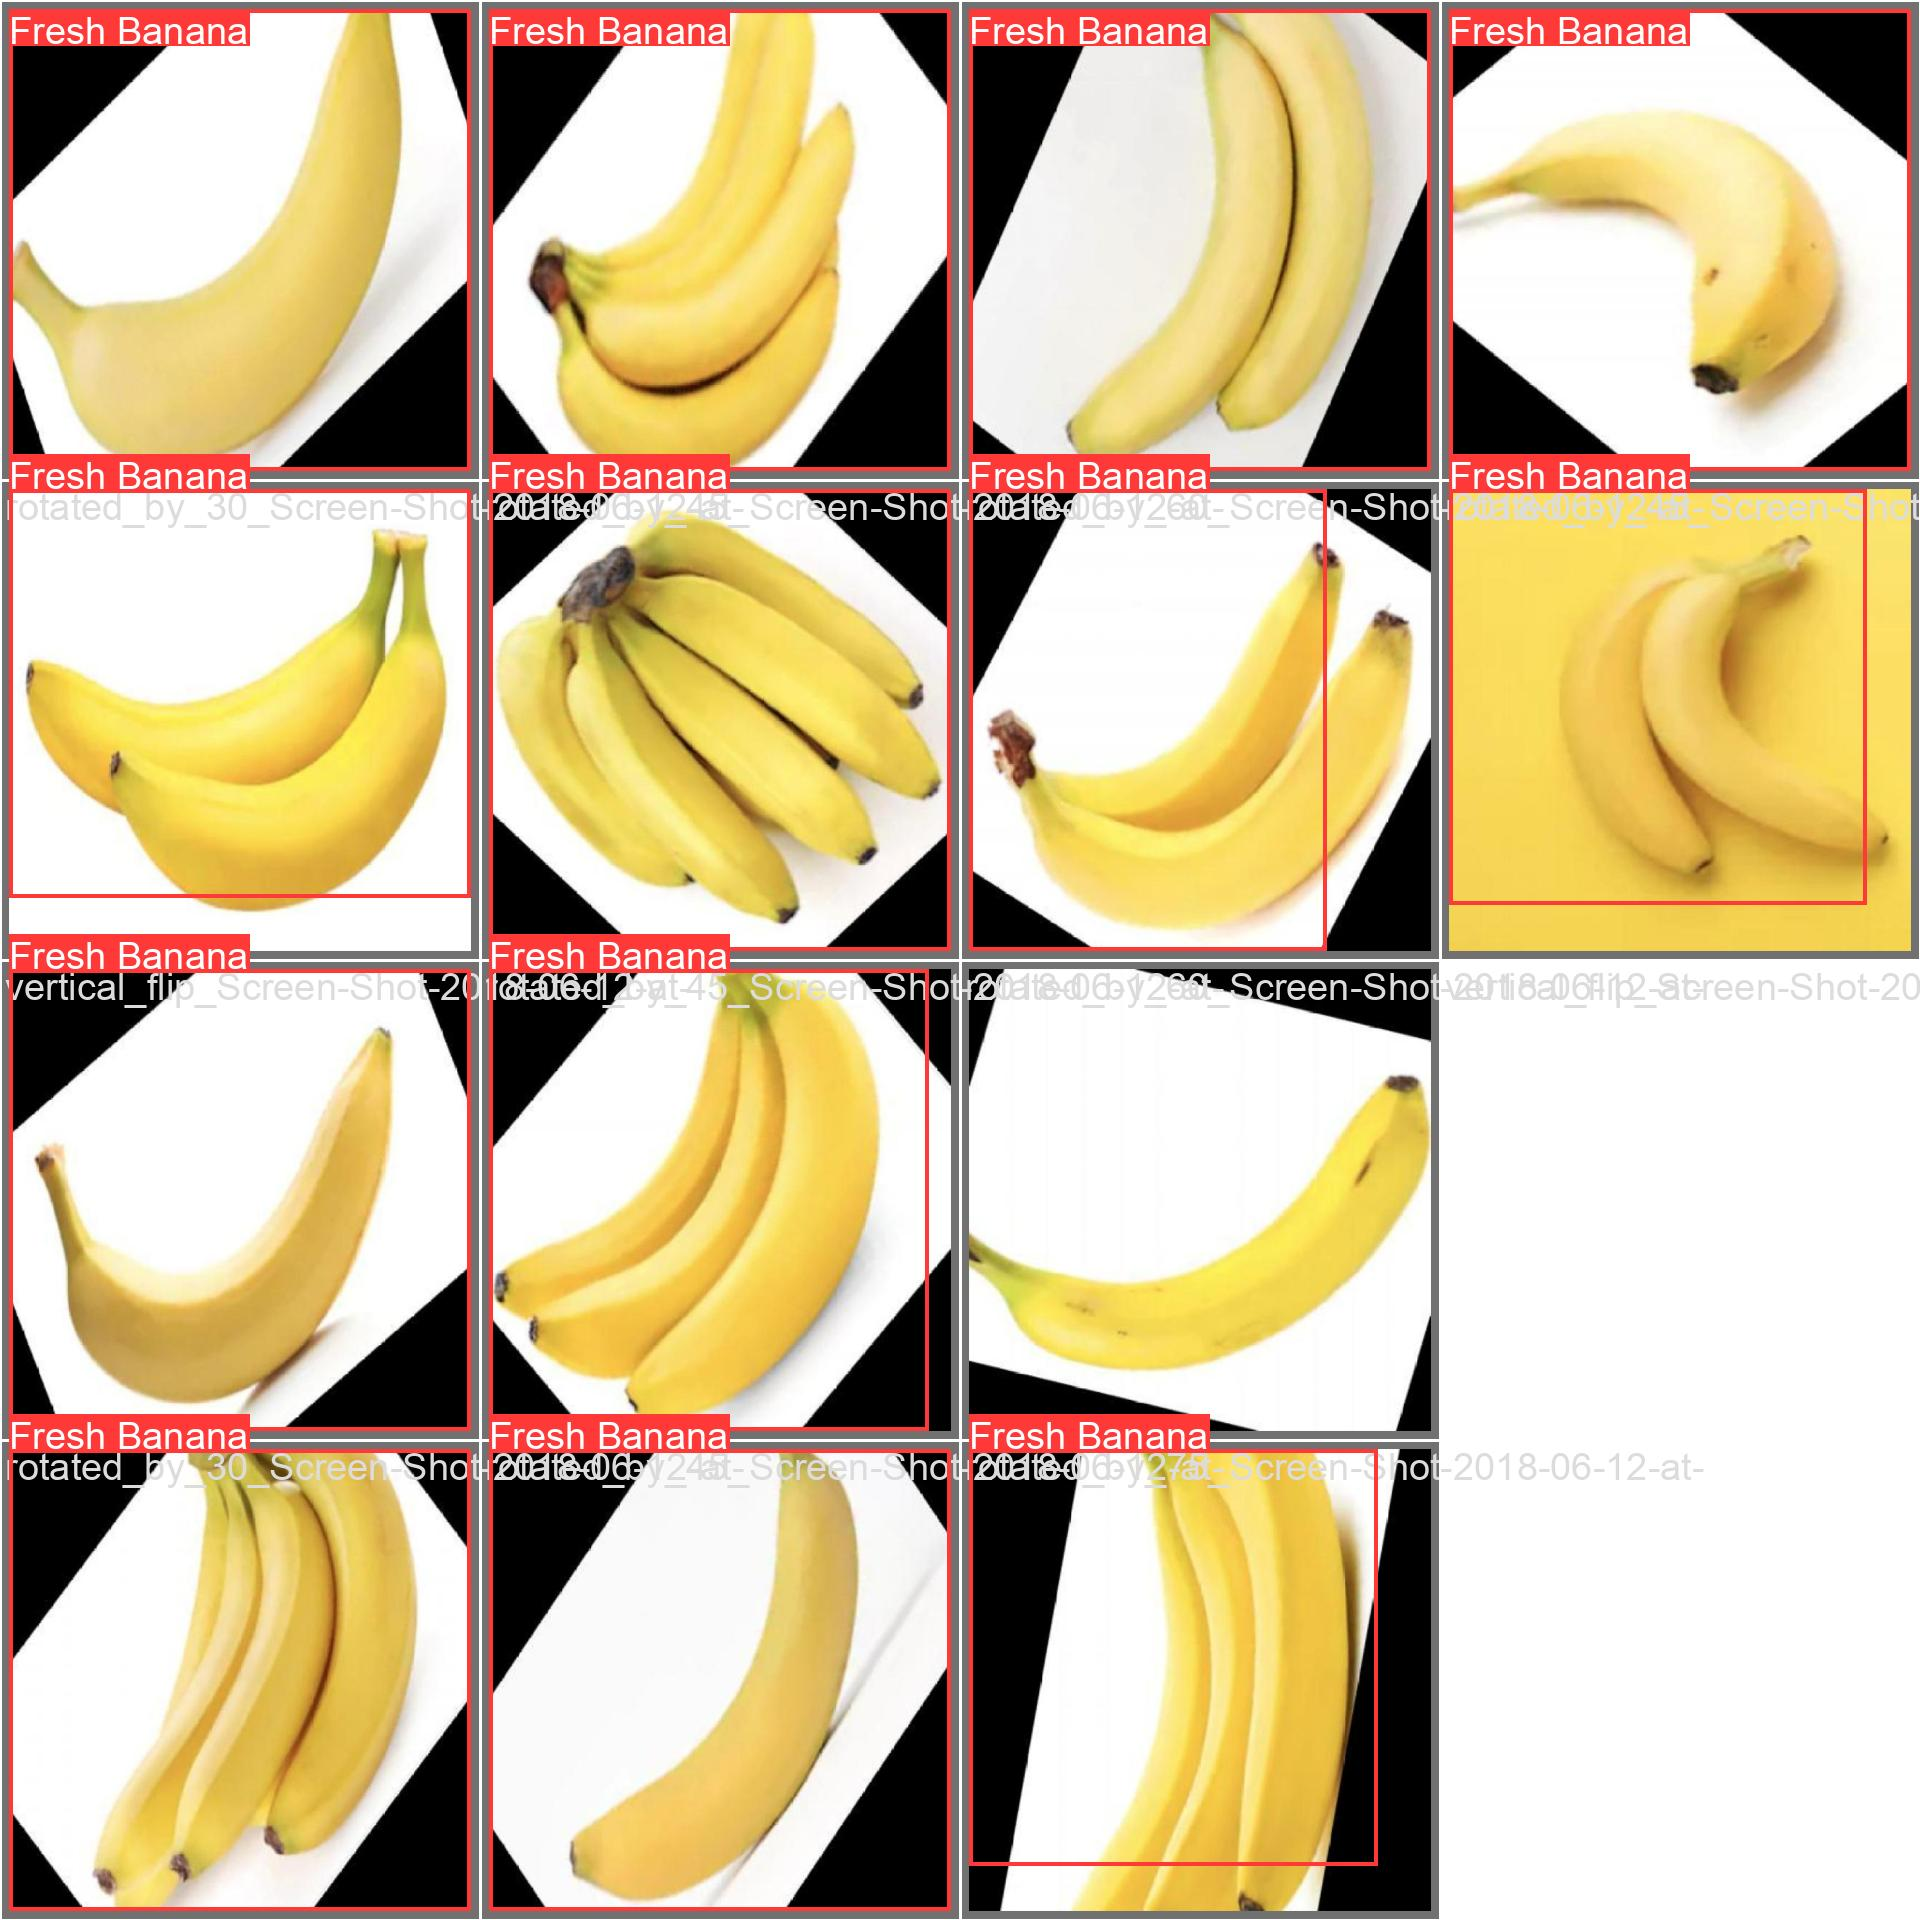

In [32]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/val_batch1_labels.jpg',width=500)

/content


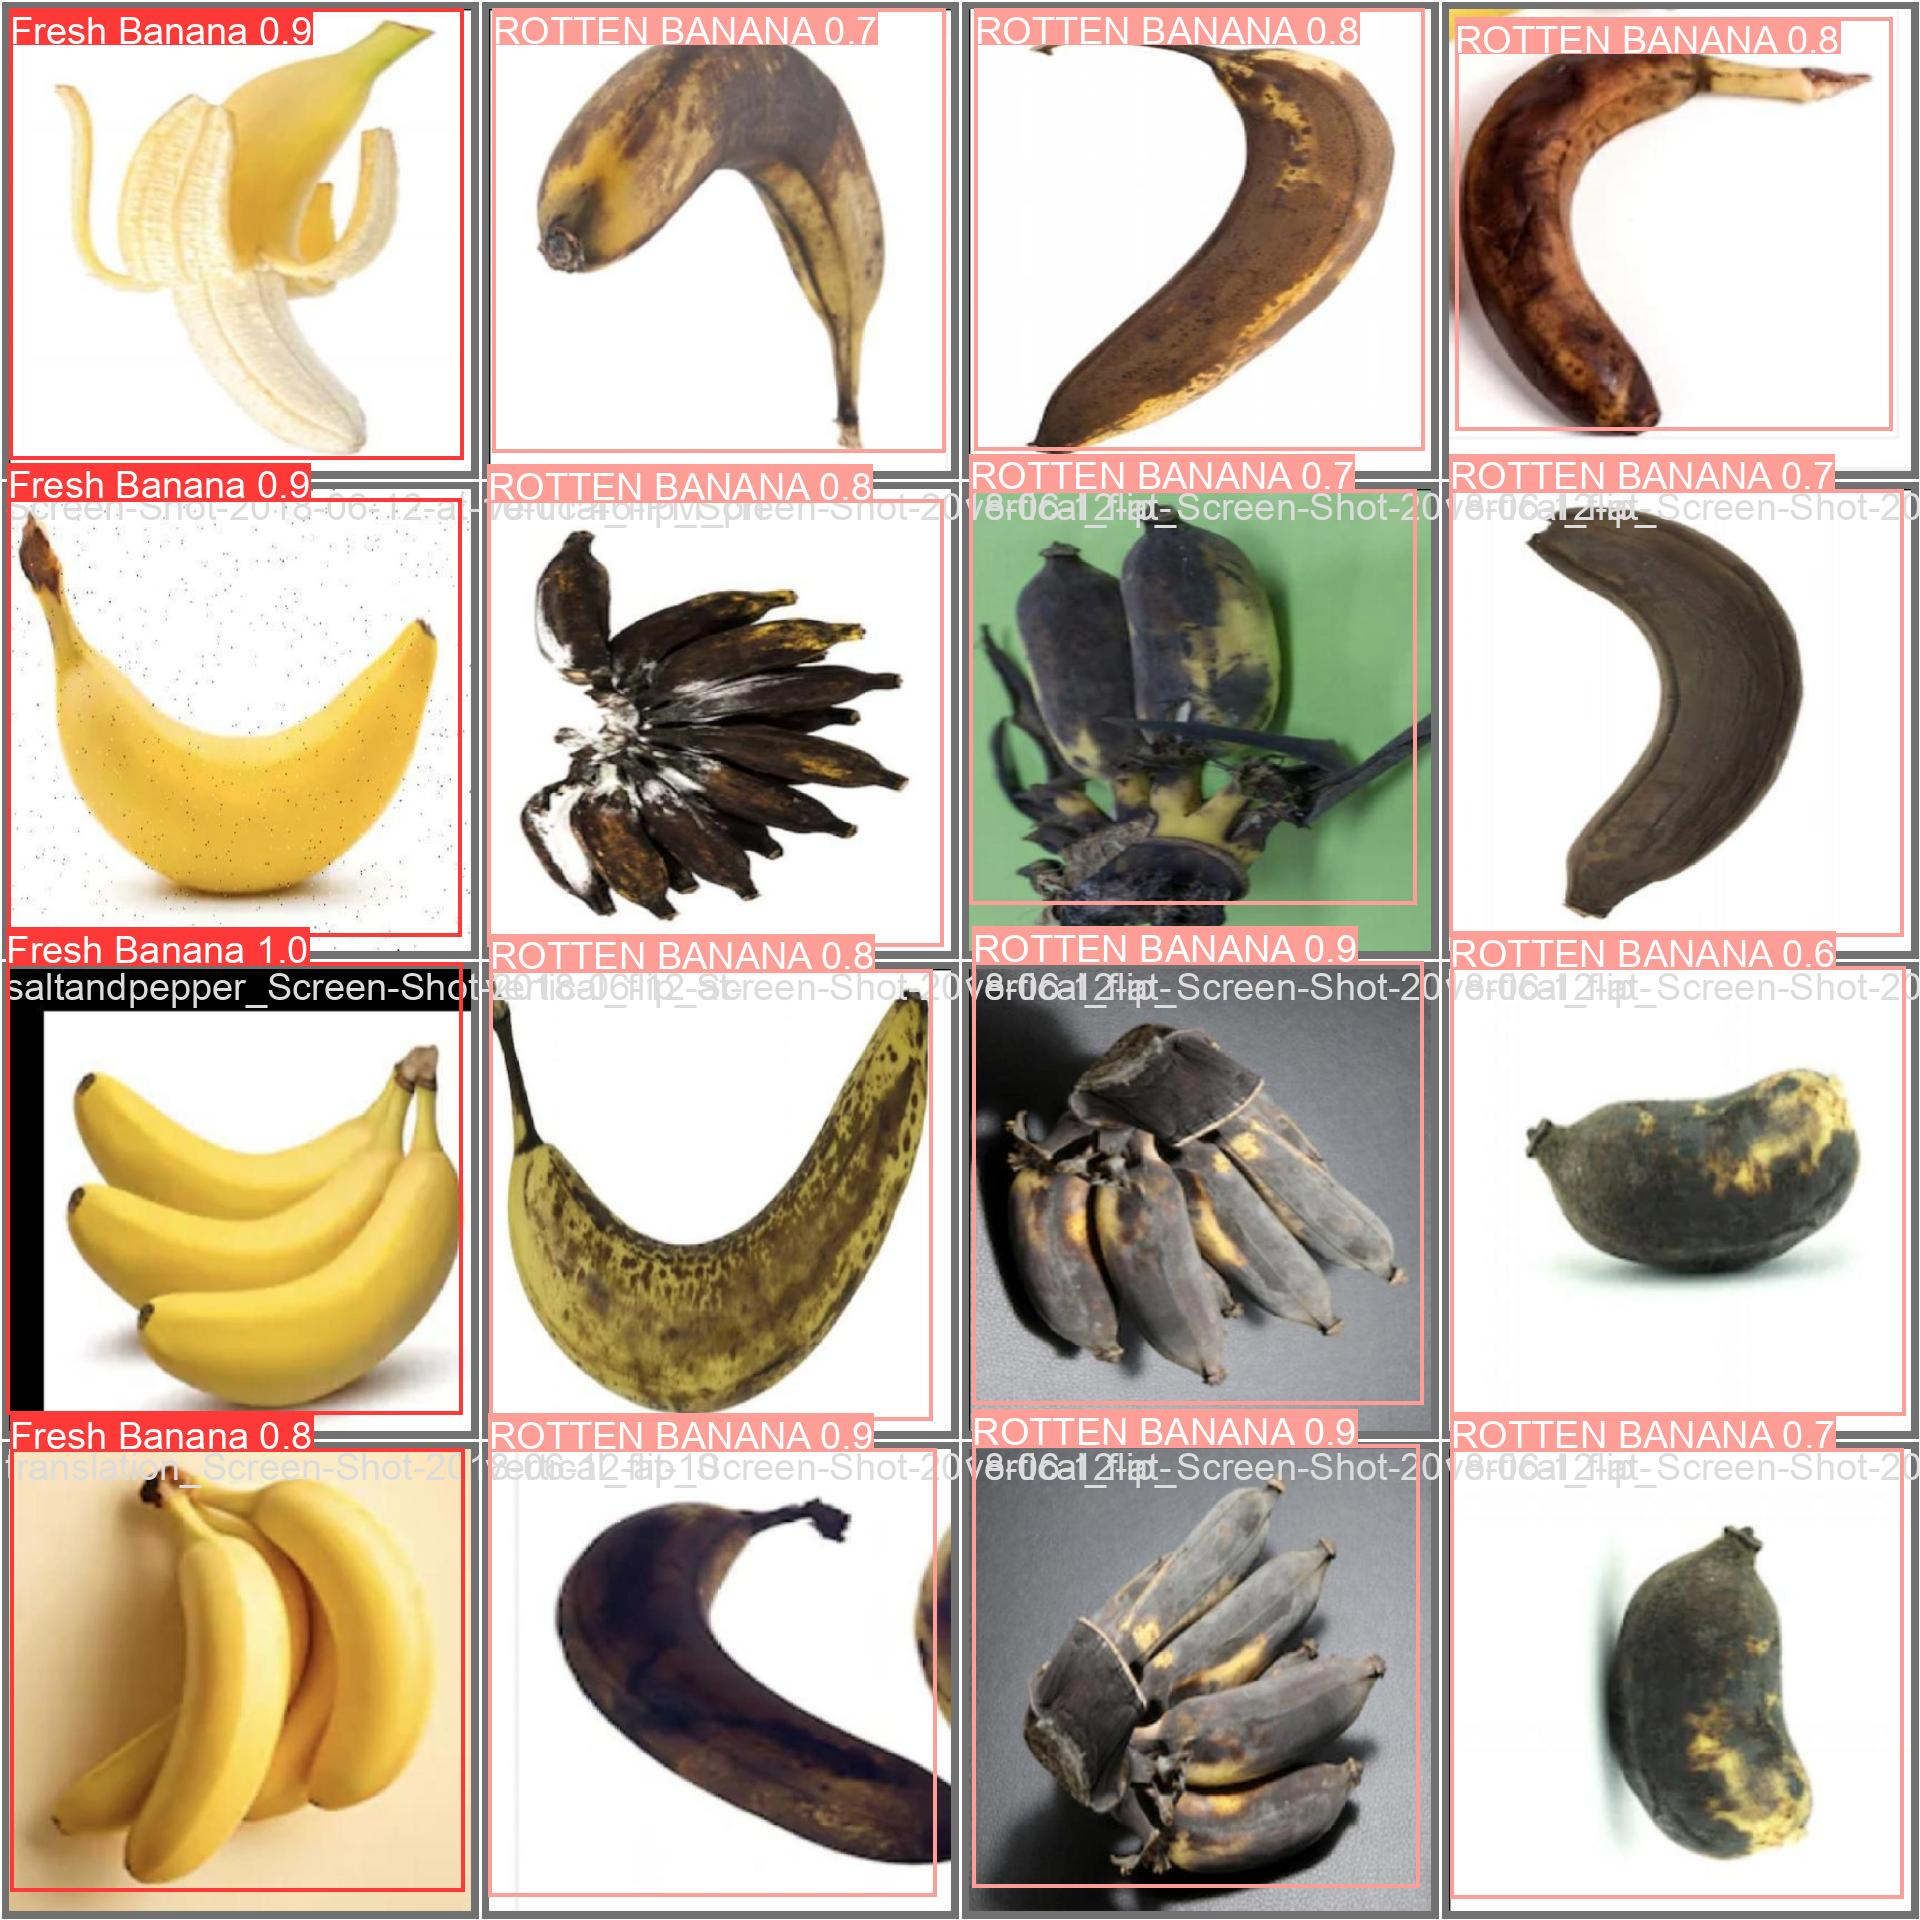

In [33]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg',width=500)

/content


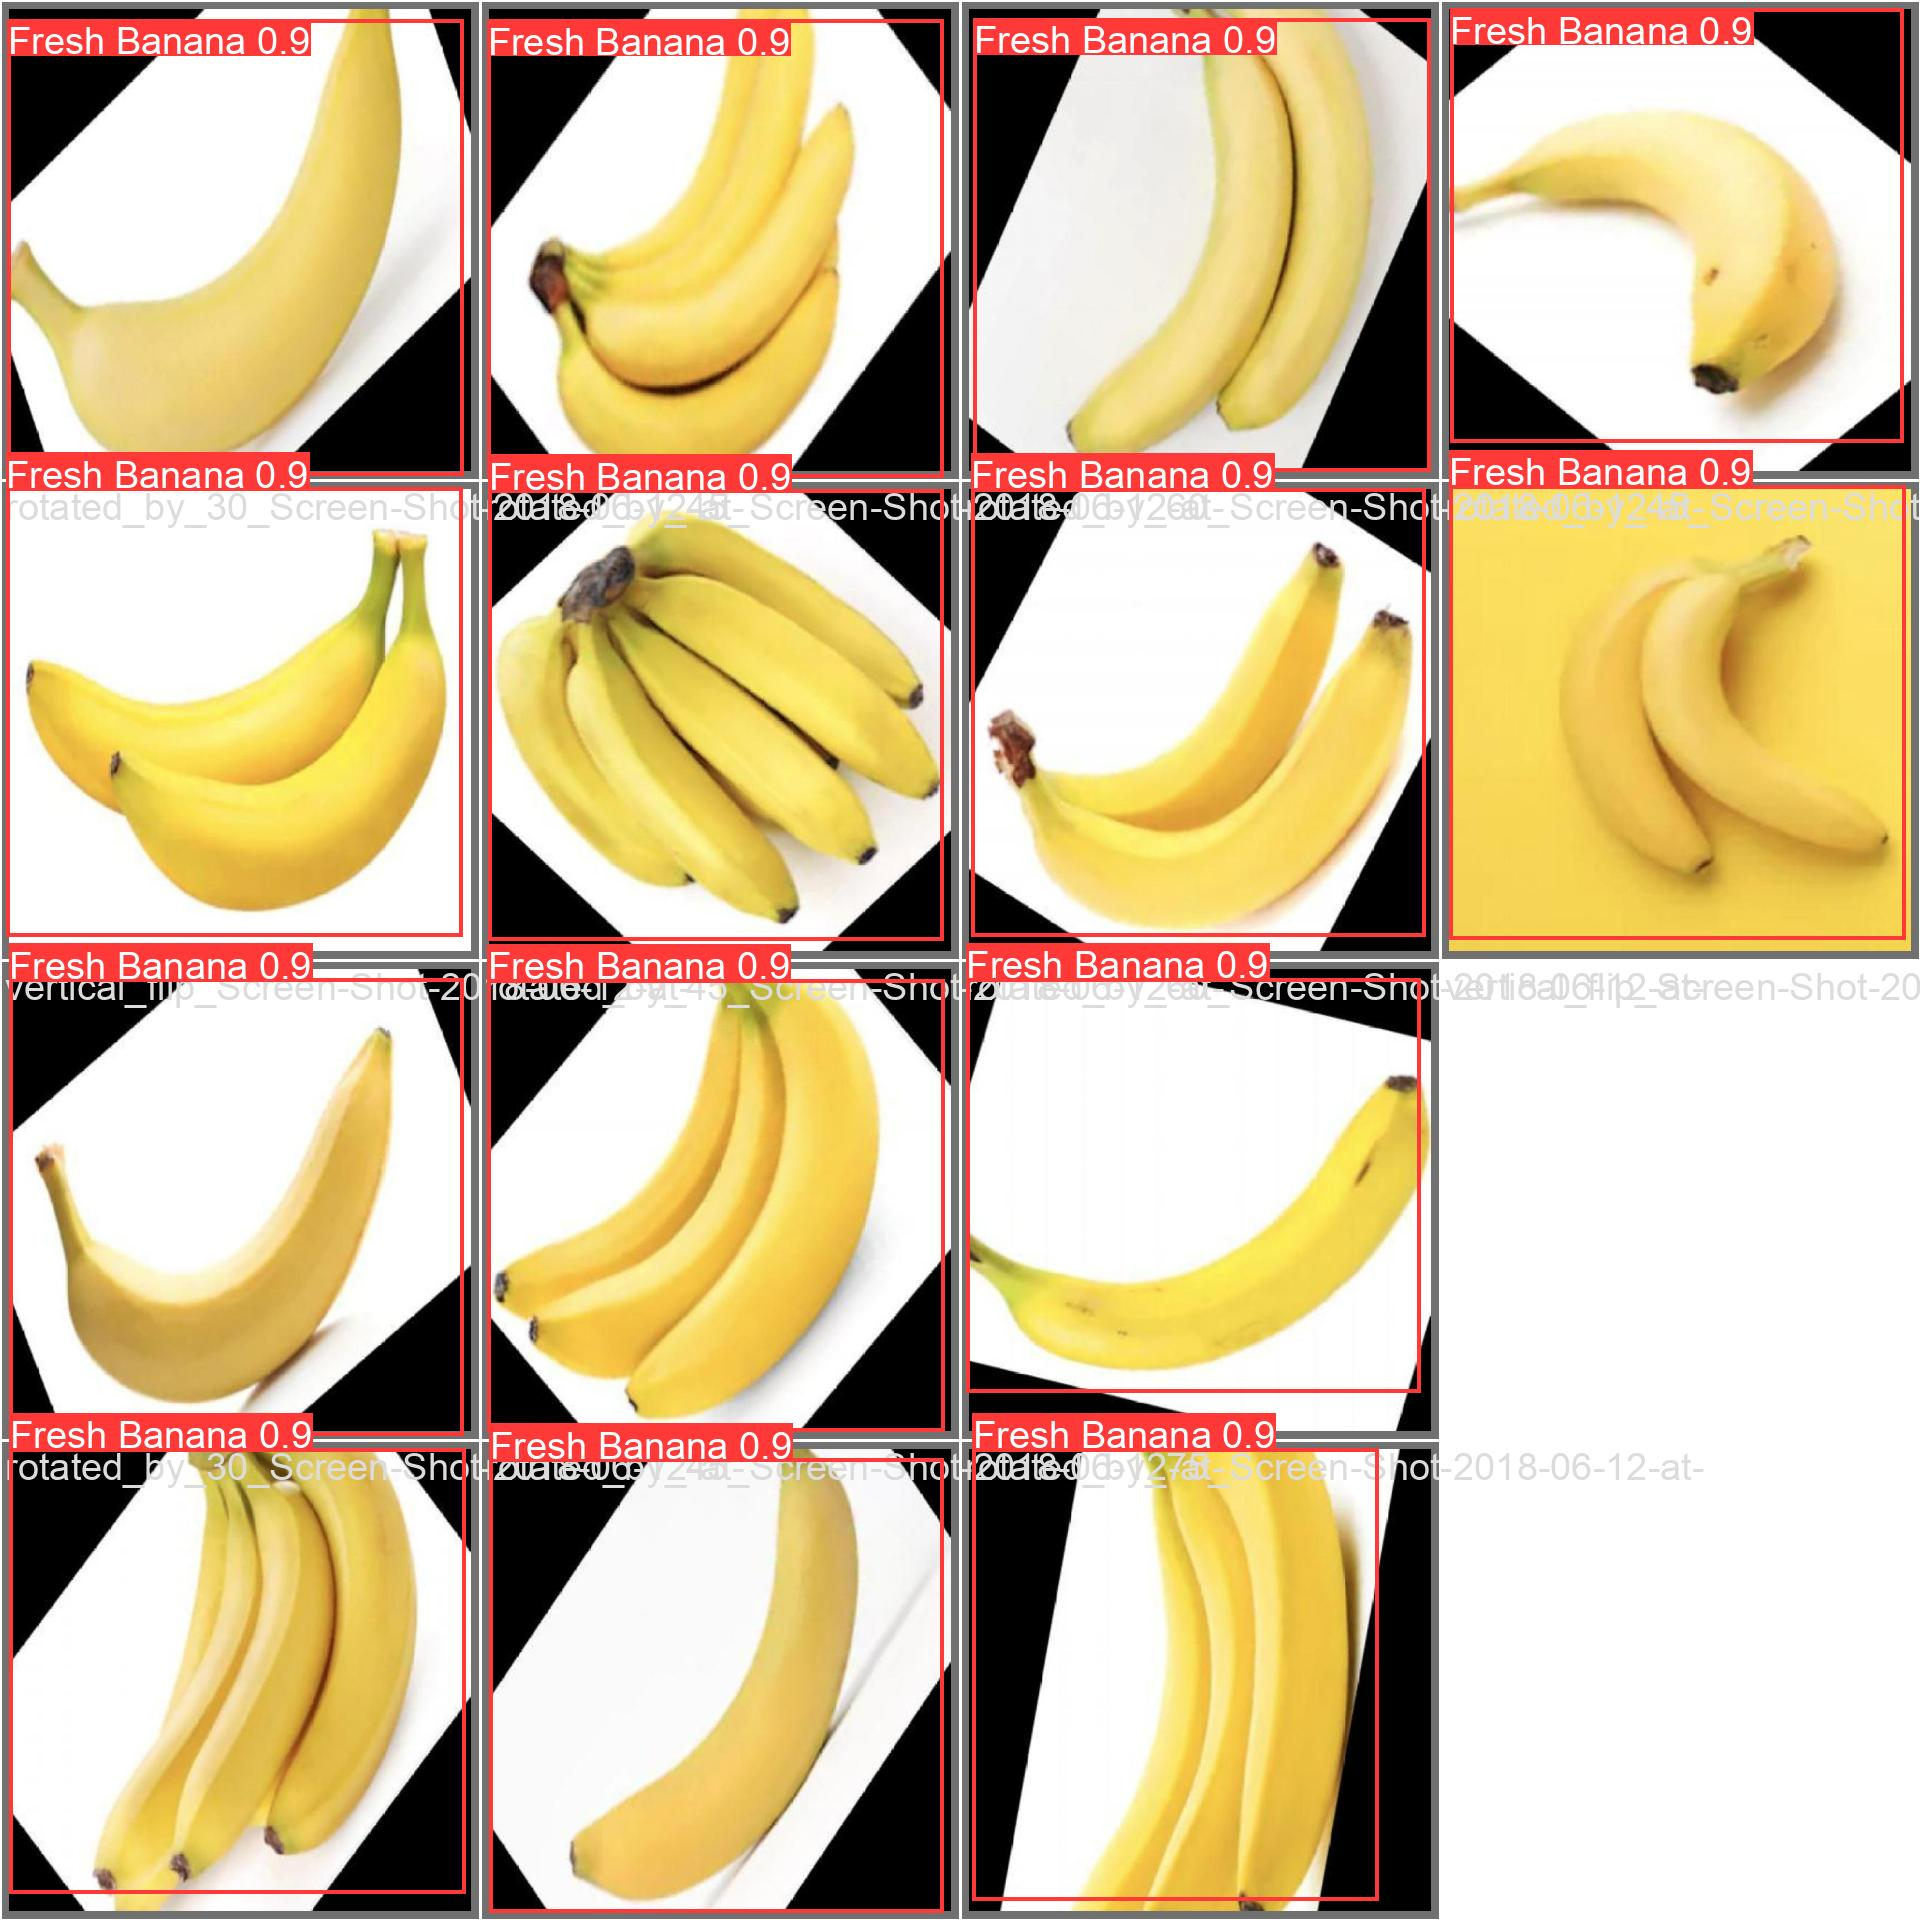

In [34]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/val_batch1_pred.jpg',width=500)

# ***Check Total Number Of Fresh Banana Or Rotten Bannana and Validate It Custom Model***

In [35]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-08 06:50:58.265287: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 06:50:59.157374: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Rotten-or-Fresh-Banana-Identification-1/valid/labels.cache... 46 images, 1 backgrounds, 0 corrupt: 100% 46/46 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.25it/s]
                   all         46         45      0.895      0.945      0.915      0.736
         

# ***Predict All The Images According To Their weights***

In [37]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-09-08 06:53:42.245742: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 06:53:43.618524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/33 /content/datasets/Rotten-or-Fresh-Banana-Identification-1/test/images/Screen-Shot-2018-06-12-at-10-00-37-PM_png_jpg.rf.90e4fa26521410486d4263a1461de729.jpg: 800x800 2 Fresh Bananas, 10.0ms
image 2/33 /content/datasets/Rotten-or-Fresh-Banana-Identification-1/test/images/Screen-Shot-2018-06-12-at-9-41-26-PM_png_jpg.rf.00e8ca13e671c45de483dbfd3d03e9a9.jpg: 800x800 1 Fres

# ***Plot Some Prediction Images After Training Custom Model***

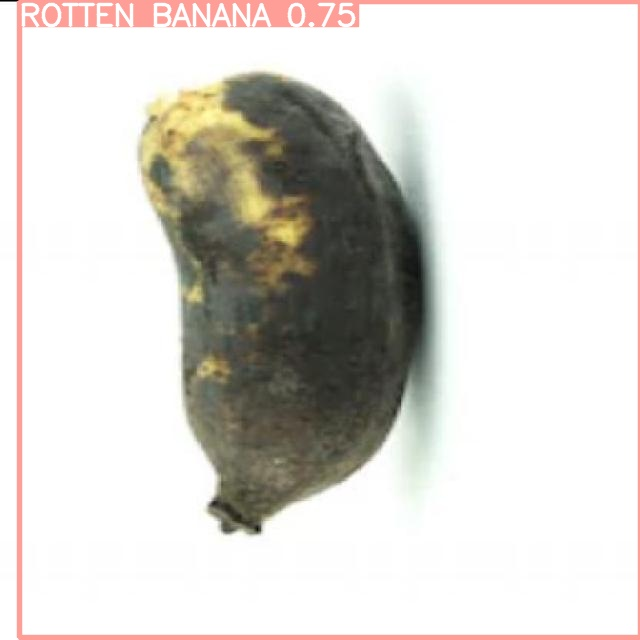

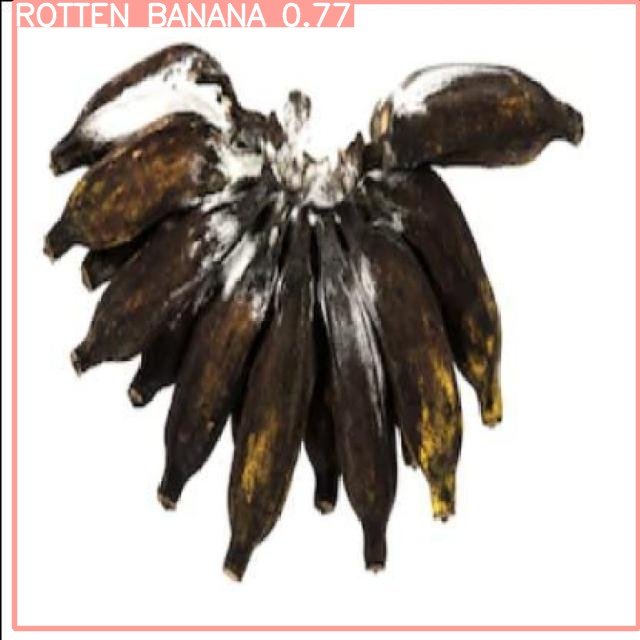

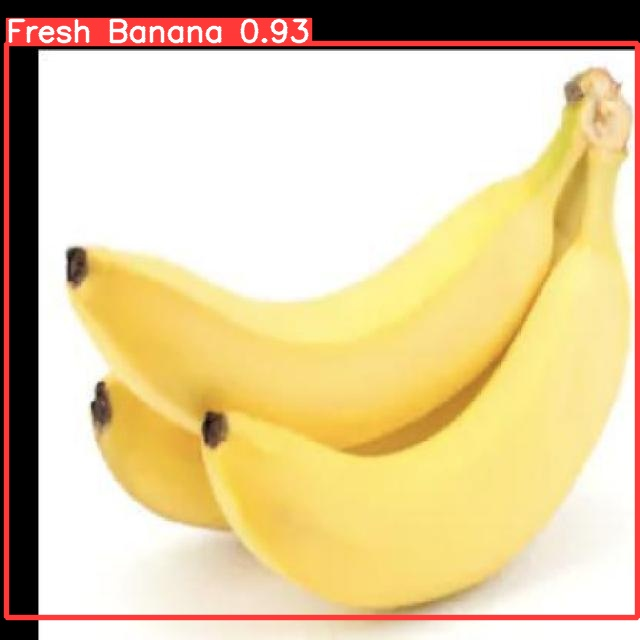

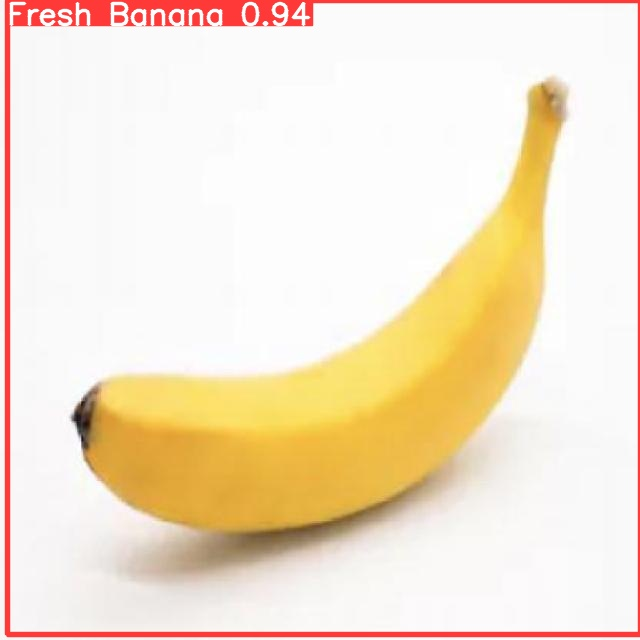

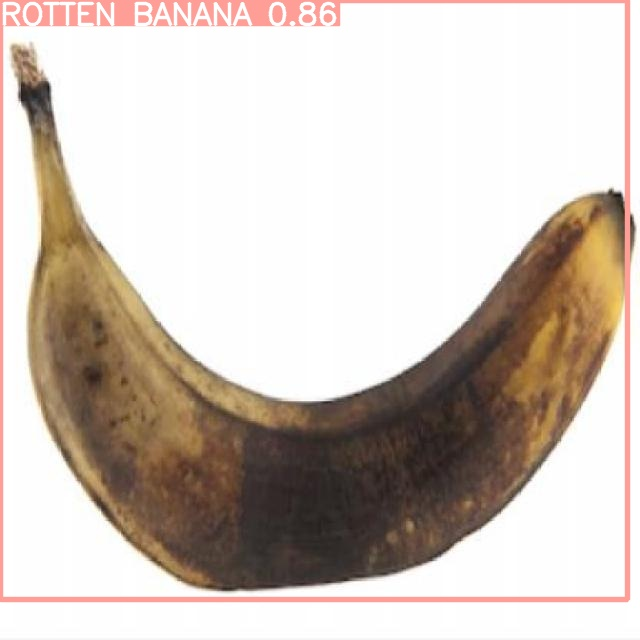

In [39]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

# ***So Our Project Of Detect The Fruit is Done With The Help Of Yolov8***

# ***Thanks***
# ***Your Faithfully - Kartik Mittal***